# **Project Description :**
In recent years, clean energy development has benefited humans in many sectors, especially financially, due to soaring energy prices. A company intends to offer a new service to local clients living near an energy source, whereby they will receive free energy when there is an excess supply. As a brilliant data scientist working for the company, your task is to build a system(model) that can predict at least 24 hours in advance whether there will be an energy surplus.

To develop this system, you are granted access to historical records in the target area dating back to 2000. This project aims to determine whether it is feasible to offer free electricity to customers during energy surpluses while minimising the risk of false positives to avoid financial losses for the company.



# **Data fields**
**temp** ==> Temperature (or mean temperature):

*   This column represents mean temperature, and since the data is from the UK, the metric is C


**dew** ==> Dew Point

**humidity** ==> Relative Humidity

*   Relative humidity is the amount of water vapour in the air compared to the maximum amount possible for a given temperature, expressed as a mean percentage. Human comfort levels are typically found between 30-70%. Values higher than 70% are considered humid. Values lower than 30% are considered dry.

**precip** ==> Precipitation

*   The amount of precipitation that falls or is predicted to fall in the specified period. The values are indicated in inches or mm.

**precipprob** ==> Precipitation chance

*  The amount of precipitation is predicted to fall in the specified period.

**preciptype** ==> Precipitation type

*   Provides the type(s) of precipitation expected. Possible values include rain, snow, freezing rain and ice.

**snow**
*   Snow is the amount of new snow that has fallen in the period.

**snow depth**
*   Snow depth is the average amount of snow currently on the ground for the time period

**windspeed**

*   The wind speed indicates the wind speed for the location and period requested. The hourly speed and direction values are the average (mean) of the speed the two minutes prior to the measurement being recorded


**winddir** ==> Wind Direction:

*   The wind direction indicates the location and time period requested. The hourly  direction values are the average (mean) of the direction for the two minutes prior to the measurement being recorded

**sealevelpressure**

*   The atmospheric pressure at a location that reduces pressure due to the location's altitude. This is expressed in millibars

**cloudcover**
*   Cloud cover is the amount of sky covered by clouds expressed as a percentage. The cloud coverage is for all altitudes. Daily values include the mean of the hourly cloud coverage values.

**solarradiation**


*   Solar radiation is the general term for the energy emitted from the sun. The solar radiation measures the power (in W/m2) at the instantaneous moment of the observation

*   It refers to the entire electromagnetic spectrum emitted by the sun, including visible light, ultraviolet (UV) rays, infrared (IR) radiation, and radio waves.

**solarenergy**

*   It refers explicitly to the portion of solar radiation we can capture and convert into valuable forms of energy, such as heat and electricity.
Conversion technologies: Technologies like solar panels and thermal collectors transform this energy into usable forms.


**uvindex**
*   A value between 0 and 10 indicates the ultraviolet (UV) exposure level for that hour or day.




# **Loading Data**

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby
import warnings
warnings.filterwarnings('ignore')

In [2]:
!unzip Brighton.zip

Archive:  Brighton.zip
   creating: Brighton/
  inflating: Brighton/brighton_001.csv  
  inflating: Brighton/brighton_002.csv  
  inflating: Brighton/brighton_003.csv  
  inflating: Brighton/brighton_004.csv  
  inflating: Brighton/brighton_005.csv  
  inflating: Brighton/brighton_006.csv  
  inflating: Brighton/brighton_007.csv  
  inflating: Brighton/brighton_008.csv  
  inflating: Brighton/brighton_009.csv  
  inflating: Brighton/brighton_010.csv  
  inflating: Brighton/brighton_011.csv  
  inflating: Brighton/brighton_012.csv  
  inflating: Brighton/brighton_013.csv  
  inflating: Brighton/brighton_014.csv  
  inflating: Brighton/brighton_015.csv  
  inflating: Brighton/brighton_016.csv  
  inflating: Brighton/brighton_017.csv  
  inflating: Brighton/brighton_018.csv  
  inflating: Brighton/brighton_019.csv  
  inflating: Brighton/brighton_020.csv  
  inflating: Brighton/brighton_021.csv  
  inflating: Brighton/brighton_022.csv  
  inflating: Brighton/brighton_023.csv  
  inflating

In [3]:
def data_loading(folder_path):
  """
    Loads and clean CSV in a folder and combines in one CSV file

    Args:
        folder_path (str): Path to the folder containing the CSV files.

    Returns:
       DataFrame that combine all CSV files
  """
  #Loop Through all the files in the folder
  for fname in glob.glob(folder_path):
    df= pd.read_csv(fname)
    #check if the data have column named "0"
    if "0" in df.columns:
      #save the file without index or header
      df.to_csv(fname,index=False, header=False)
  #Creeate a file path to data folder
  joined_files = os.path.join(folder_path)
  # Get a list of all file paths in the specified folder
  joined_list = glob.glob(joined_files)
  #Concatenate all DataFrame in the folder into a single DataFrame
  df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
  #save the concatenated CSV file
  df.to_csv("Brighton.csv",index=False)
  return df

In [4]:
#Call data_loading function to load the data
df= data_loading("Brighton/*")

In [5]:
# Convert the 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
#set datatime as an index in the dataframe
df.set_index('datetime', inplace=True)
#sort the data by date
df=df.sort_index()


# **Drop Dupicates**

In [6]:
#check The number of rows
len(df)

122844

In [7]:
#Checking if there is duplicates in index
df.index.duplicated().any()

True

In [8]:
#Drop the duplicates
df = df[~df.index.duplicated()]

In [9]:
#check the number of rows after dropping duplicates
len(df)

122830

there were only 14 duplicates found, which is a low number.  Therefore, its deleted

# **Missing Rows**

It's important to determine the missing rows and add them to the data, and fill their values with **NaN** (Not a Number) to deal with them later as missing values.

In [10]:
#Start date for the data
start_date = df.index.min()
#End date for the data
end_date = df.index.max()
# Create a complete date range with hourly frequency
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
# Find missing dates/times
missing_dates = date_range.difference(df.index)
# Printing the missing dates
print(missing_dates)
# Number of missing values
print(f"The Number of Missing Rows is : {len(missing_dates)}")

DatetimeIndex(['2010-03-28 01:00:00', '2011-03-27 01:00:00',
               '2012-03-25 01:00:00', '2013-03-31 01:00:00',
               '2014-03-30 01:00:00', '2015-03-29 01:00:00',
               '2016-03-27 01:00:00', '2017-03-26 01:00:00',
               '2018-03-25 01:00:00', '2019-03-31 01:00:00',
               '2020-03-29 01:00:00', '2021-03-28 01:00:00',
               '2022-03-27 01:00:00', '2023-03-26 01:00:00'],
              dtype='datetime64[ns]', freq=None)
The Number of Missing Rows is : 14


In [11]:
# Insert the Missing Row and fill their values with NaN
df = df.reindex(date_range, fill_value=np.nan)

In [12]:
# Verify that Missing Row has been added
df.loc["2010-03-28 01:00:00"]

temp                NaN
dew                 NaN
humidity            NaN
precip              NaN
precipprob          NaN
preciptype          NaN
snow                NaN
snowdepth           NaN
windspeed           NaN
winddir             NaN
sealevelpressure    NaN
cloudcover          NaN
solarradiation      NaN
solarenergy         NaN
uvindex             NaN
Name: 2010-03-28 01:00:00, dtype: object

# **Conducting Basic Analysis**

In [13]:
# Extract Day, Month, Year, DayOfYear and WeekOfYear from datatime
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['DayOfYear'] = df.index.dayofyear
df['WeekOfYear'] = df.index.isocalendar().week

In [14]:
#Calculate The NaN Values in each columns and their persentage
nan_counts = pd.DataFrame({'NaN Count': df.isna().sum(), 'Percentage': (df.isna().sum() / len(df))*100})
nan_counts

NaN Count  Percentage
temp                    268    0.218163
dew                     290    0.236072
humidity                283    0.230373
precip                  293    0.238514
precipprob              300    0.244212
preciptype           111572   90.824135
snow                  33044   26.899157
snowdepth             33575   27.331412
windspeed               275    0.223861
winddir                 291    0.236886
sealevelpressure        539    0.438768
cloudcover              302    0.245840
solarradiation          344    0.280030
solarenergy             378    0.307707
uvindex                 372    0.302823
Day                       0    0.000000
Month                     0    0.000000
Year                      0    0.000000
DayOfYear                 0    0.000000
WeekOfYear                0    0.000000

The Above Table shows the number of missing valueus for each feature and the percentage of the missing values. From the above table we can colclude the follows

*   **preciptype** have very high percentage of missing value almost 90% of the data is missing
*   **snow** and **snow depth** have around 25% of missing values
*   The Rest of feature have around 0.2%


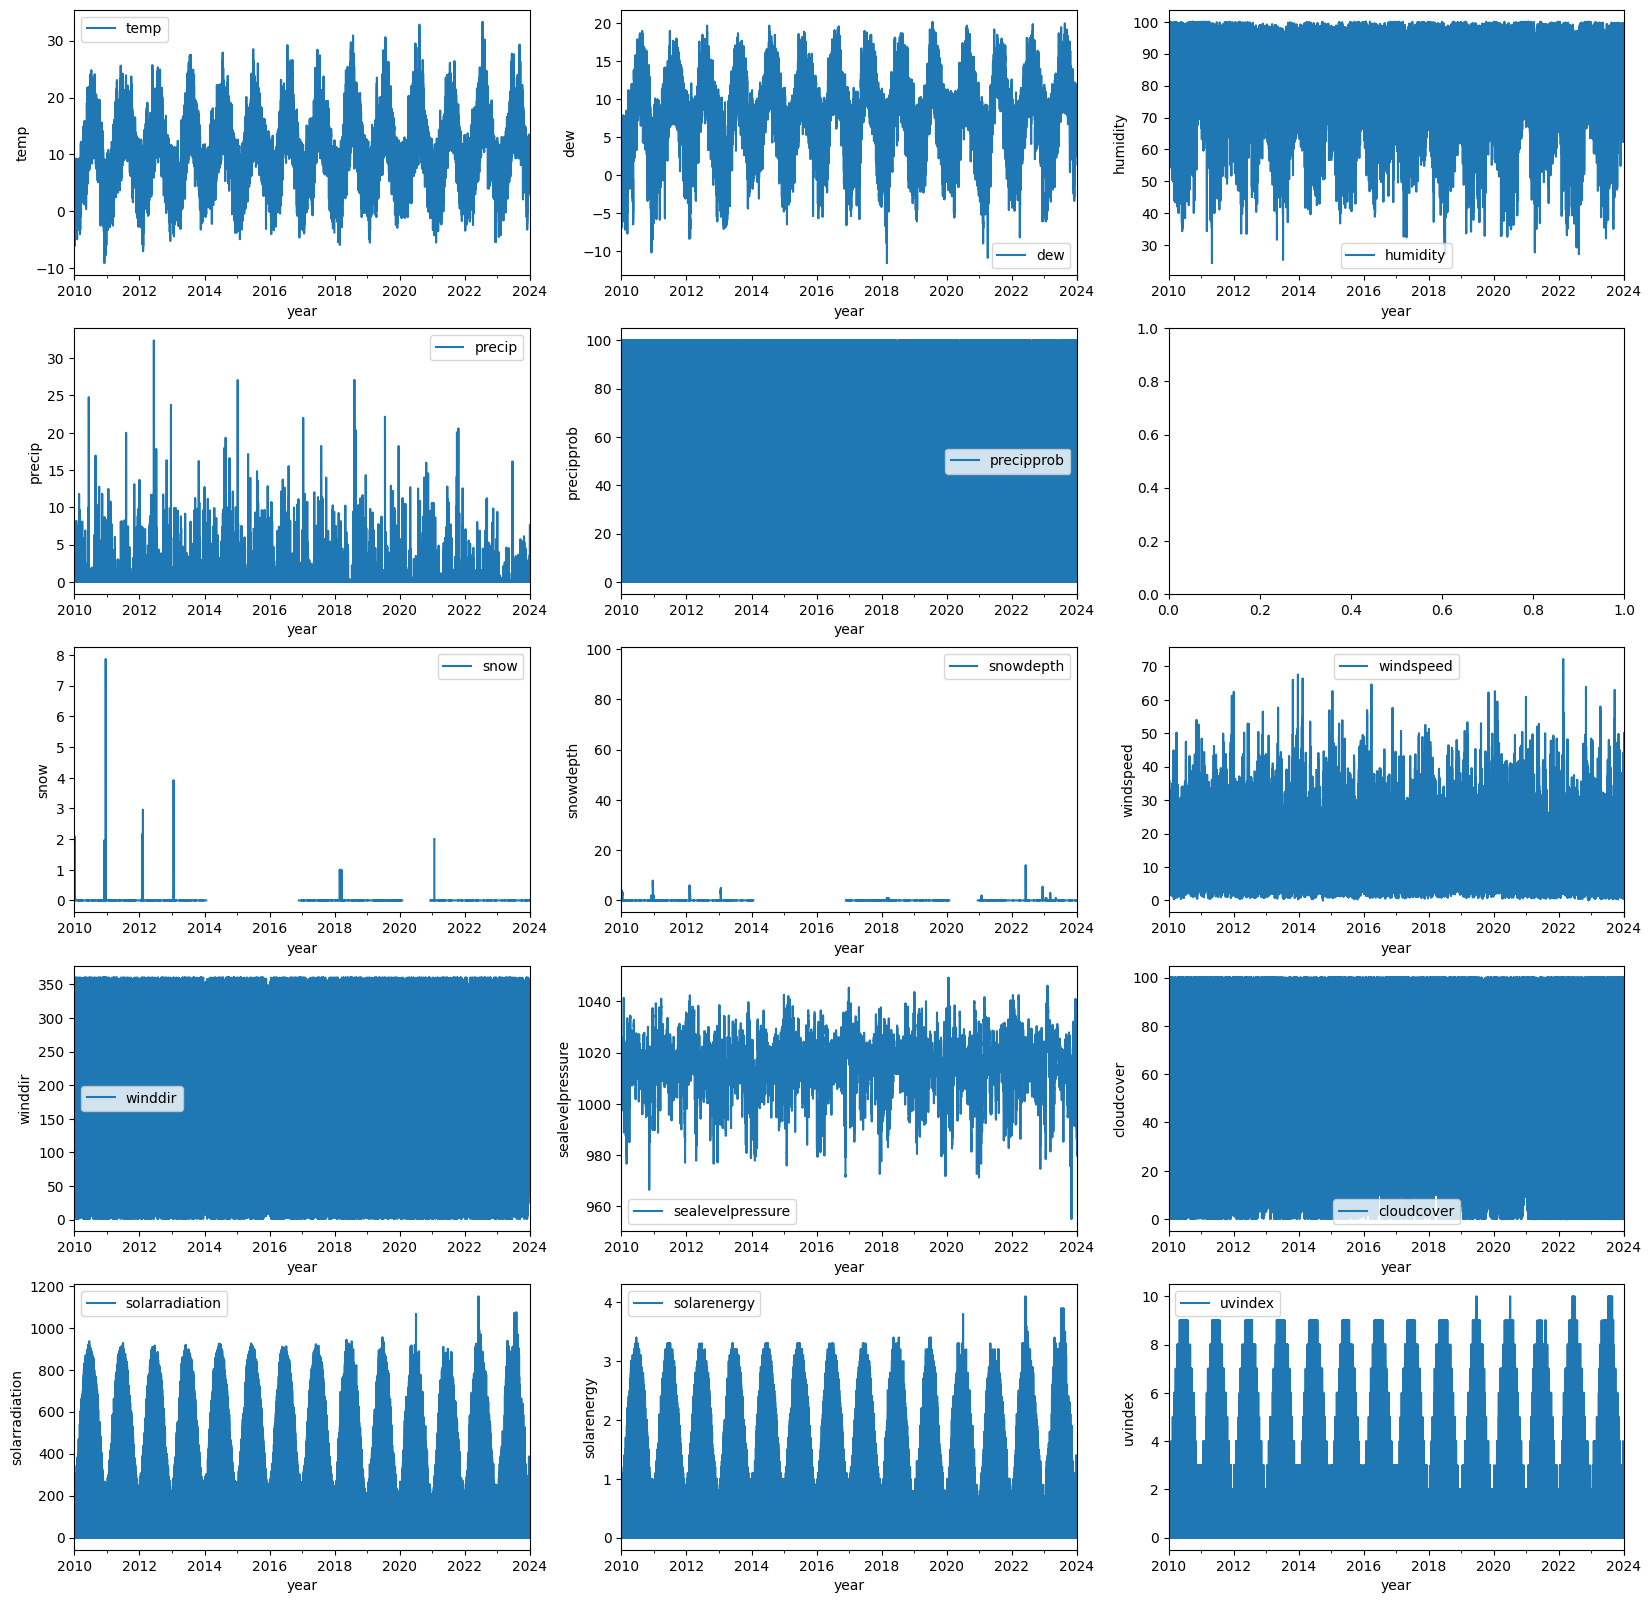

In [15]:
#set figure size
plt.figure(figsize=(20, 20))
#Iterate through the first 15 columns
for i in range(0,15):
  plt.subplot(5,3,i+1)
  # Skip plotting the column "preciptype"
  if df.columns[i] == "preciptype":
    continue
  # Plot the data from the current column
  df[df.columns[i]].plot()
  #Set the labels
  plt.xlabel('year')
  plt.ylabel(df.columns[i])
  plt.legend()

From the above Graph, we conclude :


> **Temp/Dew/Humidity**


*   temp/dew/Humidity follow a seasonal pattern while there is a trend in the right side of the graph of Temp and dew

According to [1], There is a law to calculate dew point from temp and relative humidity


$Td = T - \frac{100 - RH}{5.0}$

This indication that these three features will be correlated


> **Snow / Snow depth**

*   There is a lot of missing values between the period of 2014-2017 and 2020-2021 for both features


>**Solar Energy / Solar Radiation / UVindex**

*   The Three features have the same seasonal pattern, which they are probably related


> **Sea level pressure**

*   all values fell in a particular range except for some spikes, which can be outliers

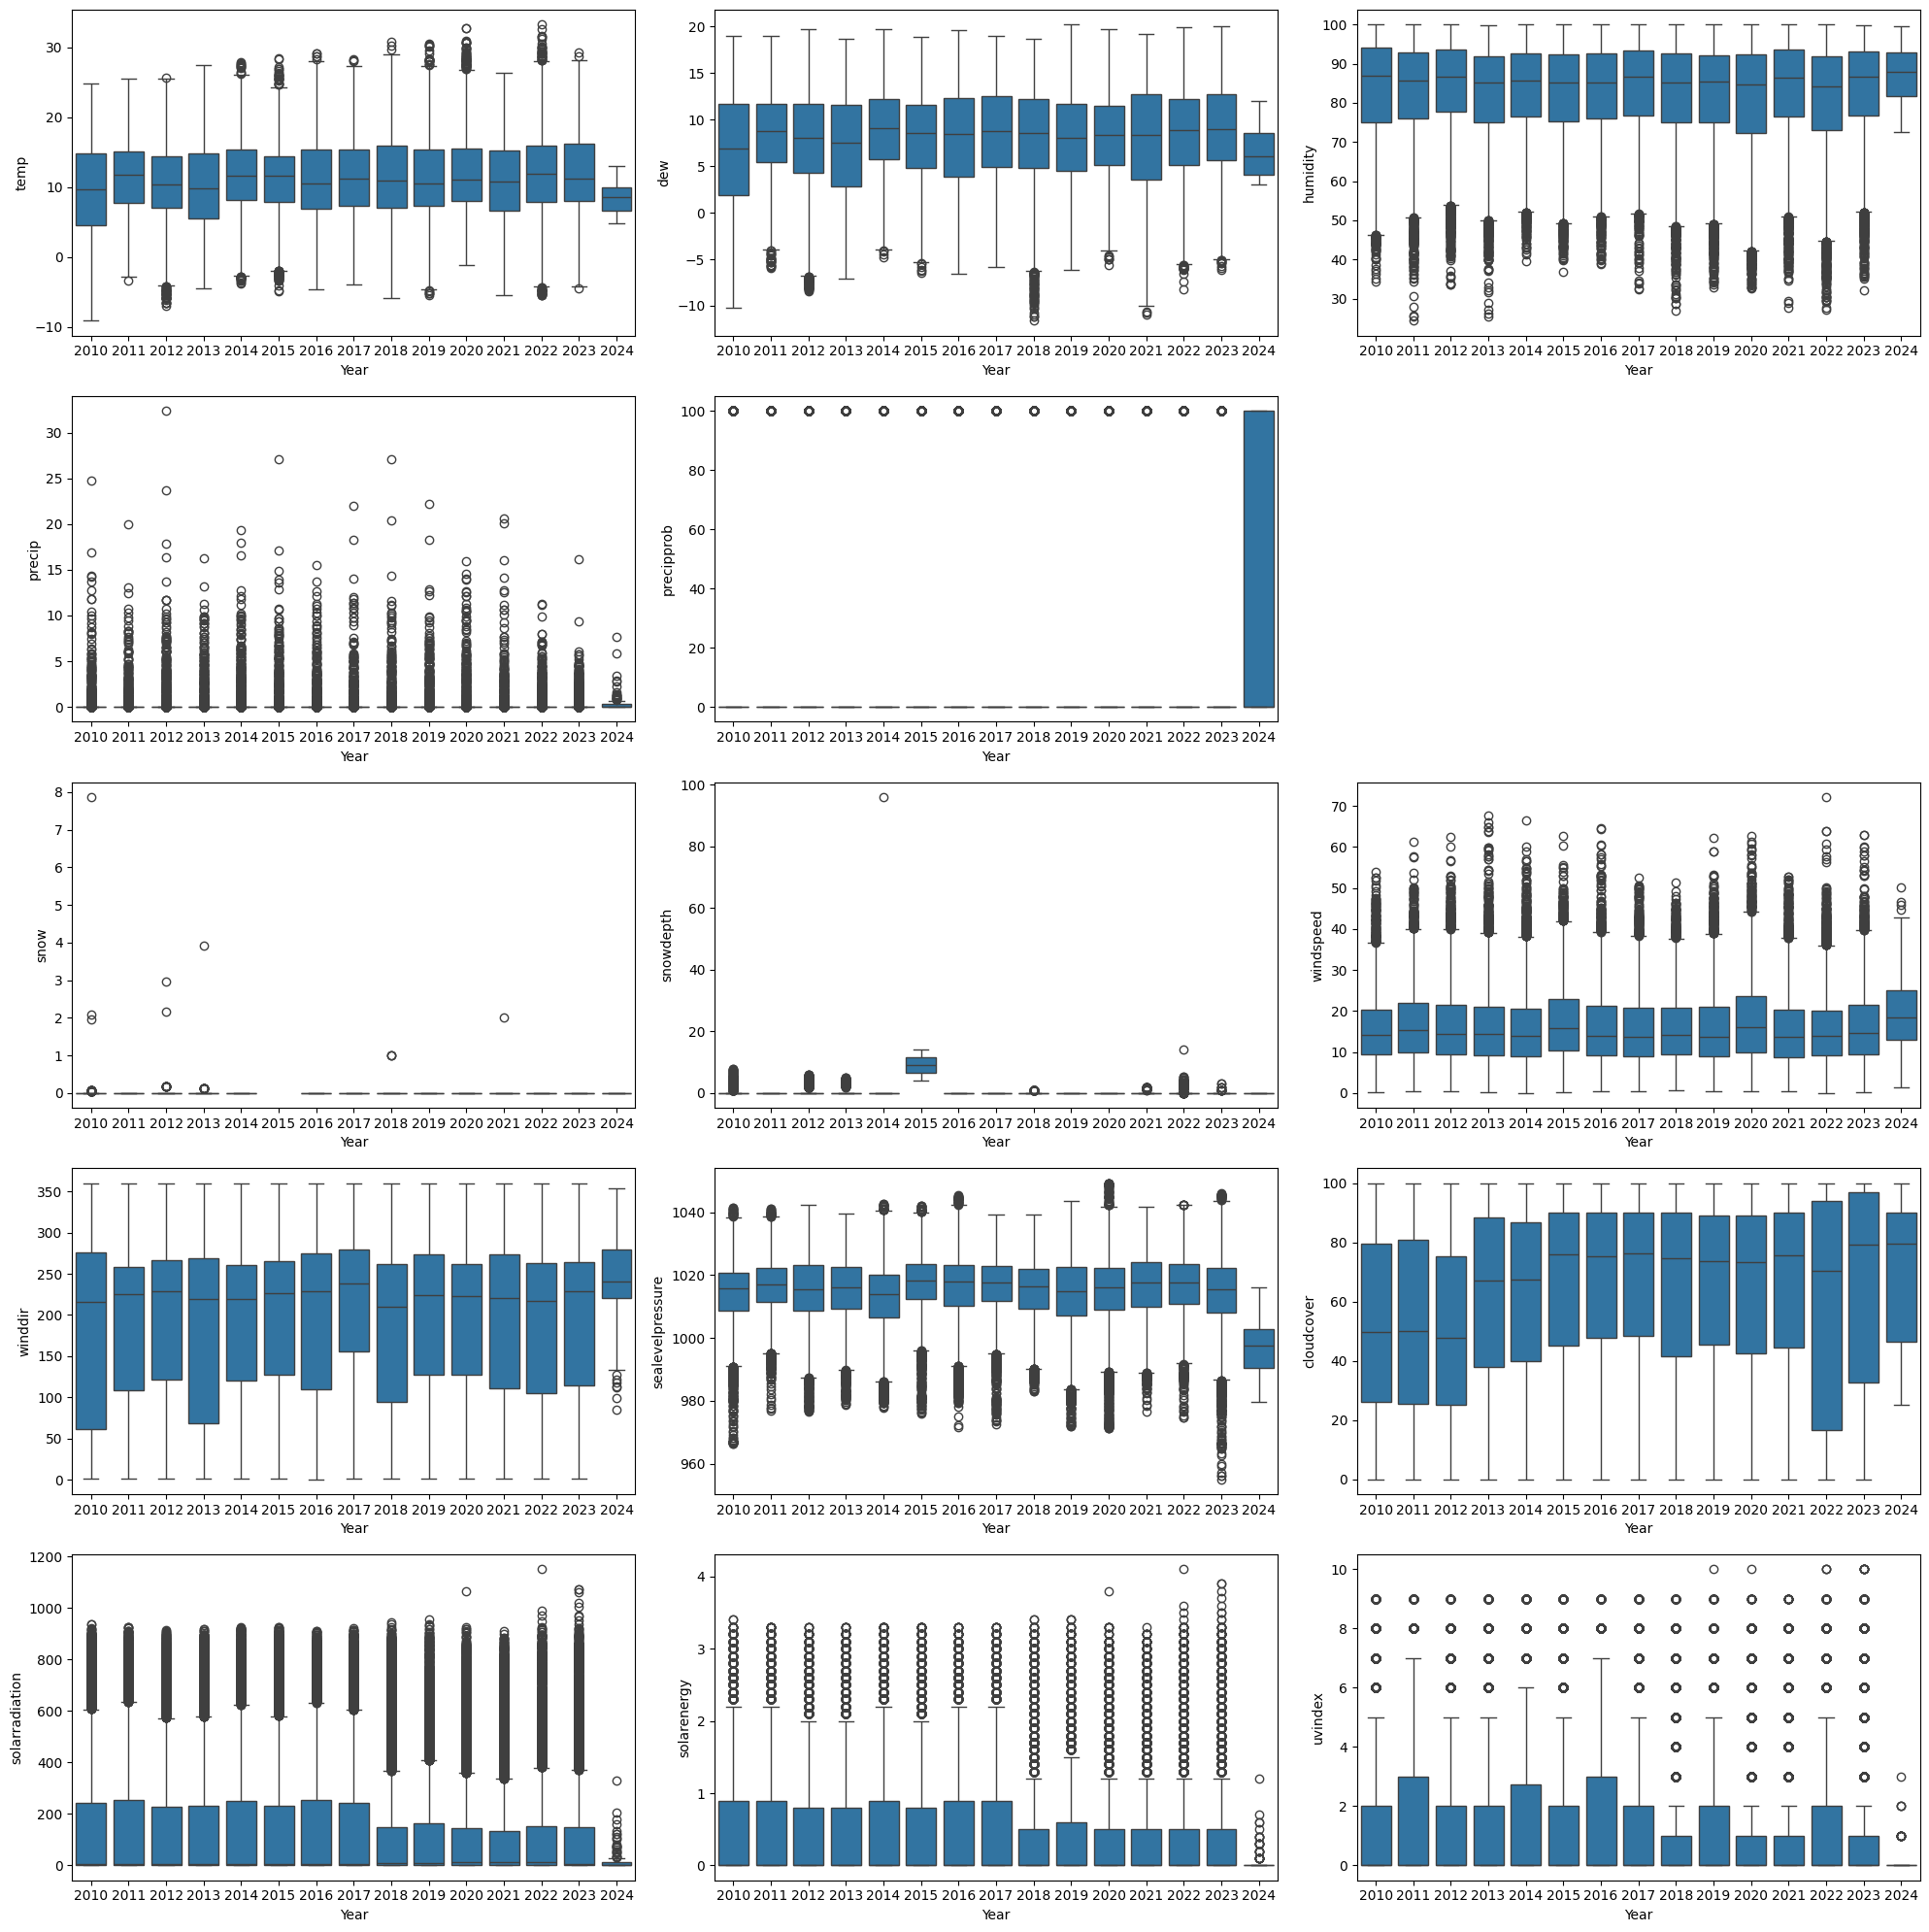

In [16]:
#set figure size
plt.figure(figsize=(20, 20))
#Iterate through the first 15 columns
for i, column in enumerate(df.columns[0:15]):
  # Skip plotting the column "preciptype"
    if column == "preciptype":
        continue
    plt.subplot(5, 3, i + 1)
    # Create a boxplot for the current column against the 'Year' column
    sns.boxplot(x='Year', y=column, data=df.reset_index())
    #Set the labels
    plt.xlabel('Year')
    plt.ylabel(column)


plt.tight_layout()
plt.show()


The presented graph facilitates the identification of outliers within the data. The dataset have outliers in most of the features.

The outliers will be dealt with after imputing the missing values


# **Data Splitting**

In [19]:
#split the data 80% trainind and 20% testing
train_df = df.iloc[:int(0.8 * len(df))]
test_df = df.iloc[int(0.8 * len(df)):]

# **Data Cleaning**

In [20]:
def consecutive_missing_values(df,feature:str):
  """
  Function to determine if there are consecutive missing values in a specified feature.

  Parameters:
  - feature (str): The name of the feature/column to check for consecutive missing values.

  Returns:
  - bool: True if there are consecutive missing values in the feature, False otherwise.

  Code source : https://huzaifahsaleem1.medium.com/finding-consecutive-days-with-missing-values-in-time-series-data-4611046ffb67
  """
  #Create (True and False) indicating the missing values
  missing_data = df[feature].isnull()
  # Initialize a list to store indices of consecutive missing values
  consecutive_missing = []
  for k, g in groupby(enumerate(missing_data), lambda x: x[1]):
    if k:
      #Save the missing values indeicies inthe list
      consecutive_missing.append(list(map(lambda x: x[0], list(g))))

  return len(consecutive_missing) != df[feature].isna().sum()

This function is used to check if there any consecutive missing values in your features

In [21]:
def MSE_Interpoation(feature,dataframe,consecutive:bool):
 """
 This Function takes a portion of the data that does not have missing values and adds missing values to it. Then, different interpolation methods are used.
  Finally, calculate the MSE (Mean Squared Error) for each method and plot (data, data with missing values, interpolation methods)
 - The Function adds missing values using two ways :
 If missing values in the feature were consecutive, the Function will add consecutive null values in the portion
 """
 #Extract the first 200 rows from the feature
 df_test = dataframe[feature].iloc[0:200,]
 df_test.reset_index(drop=True, inplace=True)
 df_test = pd.DataFrame(df_test)
 df_test[f'{feature}_missing'] = df_test[feature]
#Check if the missing values are consecutive
 if consecutive:
  start_index = 0
  #Iterate through the rows and add  consecutive Nan every 5 rows
  for i in range(len(df_test) // 10):
    end_index = start_index + 5
    df_test.loc[start_index:end_index-1, f'{feature}_missing'] = np.nan
    start_index += 10
 else:
  #add one Nan after 5 rows
  df_test.loc[df_test.index % 5 == 0, f'{feature}_missing'] = np.nan


 #Perform Interpolation using differernt methods
 df_test['interpolate_polynomial'] = df_test[f'{feature}_missing'].interpolate(method='polynomial', order=2)
 df_test['interpolate_linear'] = df_test[f'{feature}_missing'].interpolate(method='linear')
 df_test['interpolate_nearest'] = df_test[f'{feature}_missing'].interpolate(method='nearest')
 #Calculate The MSE for Each Method
 mse_poly = ((df_test[feature] - df_test["interpolate_polynomial"]) ** 2).mean()
 mse_linear = ((df_test[feature] - df_test["interpolate_linear"]) ** 2).mean()
 mse_nearest = ((df_test[feature] - df_test["interpolate_nearest"]) ** 2).mean()

 print(f"MSE polynomial {mse_poly:.4f}, MSE linear {mse_linear:.4f}, MSE nearest {mse_nearest:.4f}")

 plt.subplot(5, 1, 1)
 df_test[f'{feature}'].plot()
 plt.xlabel("Data")
 #plt.ylabel(f'{feature}')
 plt.legend()

 plt.subplot(5, 1, 2)
 df_test[f'{feature}_missing'].plot()
 plt.xlabel("Data")
 #plt.ylabel(f'{feature}_missing')
 plt.legend()

 plt.subplot(5, 1, 3)
 df_test['interpolate_polynomial'].plot()
 plt.xlabel("Data")
 #plt.ylabel('interpolate_polynomial')
 plt.legend()

 plt.subplot(5, 1, 4)
 df_test['interpolate_linear'].plot()
 plt.xlabel("Data")
 #plt.ylabel('interpolate_linear')
 plt.legend()

 plt.subplot(5, 1, 5)
 df_test['interpolate_nearest'].plot()
 plt.xlabel("Data")
 #plt.ylabel('interpolate_nearest')
 plt.legend()






This Function takes a portion of the data that does not have missing values and adds missing values to it. Then, different interpolation methods are used. Finally, calculate the MSE (Mean Squared Error) for each method and plot (data, data with missing values, interpolation methods)

- The Function adds missing values using two ways :
If missing values in the feature were consecutive, the Function will add consecutive null values in the portion

If the missing values feature were not consecutive, the Function adds a null value every five rows.


# **Missing Values**

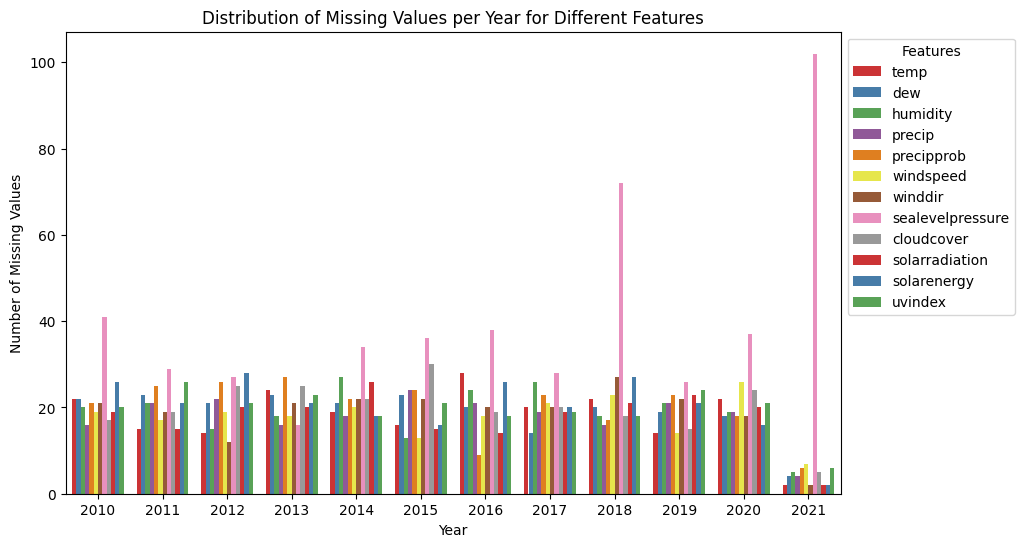

In [22]:
#Define the columns to be plotted
cols = train_df.drop(['snow', 'snowdepth', 'preciptype', 'Year', 'Month', 'Day', 'DayOfYear', 'WeekOfYear'], axis =1).columns
#Group by year and calculate the number of missing value for each feature
missing_values = train_df.groupby('Year')[cols].apply(lambda x: x.isnull().sum()).reset_index()
#Reshape the data te be plotted
missing_values_melthing = pd.melt(missing_values, id_vars=['Year'], value_vars=cols, var_name='Feature', value_name='Missing Values')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Missing Values', hue='Feature', data=missing_values_melthing,palette=sns.color_palette("Set1"))
# Set plot title, x-label, and y-label
plt.title('Distribution of Missing Values per Year for Different Features')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')

plt.legend(title='Features')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [23]:
#Calculate The NaN Values in each columns and their persentage
nan_counts = pd.DataFrame({'NaN Count': train_df.isna().sum(), 'Percentage': (train_df.isna().sum() / len(df))*100})
nan_counts

NaN Count  Percentage
temp                    218    0.177461
dew                     228    0.185601
humidity                227    0.184787
precip                  217    0.176647
precipprob              241    0.196184
preciptype            91499   74.483898
snow                  32889   26.772980
snowdepth             32886   26.770538
windspeed               215    0.175019
winddir                 226    0.183973
sealevelpressure        486    0.395624
cloudcover              239    0.194556
solarradiation          214    0.174205
solarenergy             242    0.196998
uvindex                 235    0.191300
Day                       0    0.000000
Month                     0    0.000000
Year                      0    0.000000
DayOfYear                 0    0.000000
WeekOfYear                0    0.000000

From the above graph and the data frame:

*   preciptype/sealevelpressure/snow/snow depth have a higher percentage of missing values, especially preciptype, with almost 75% of the data missing

*   Most of the Features have a similar number of missing values each year except sealevelpressure, which has more missing values (From the graph)

#Temperature, dew and humidity Missing Values imputation

In [24]:
# Number of missing values for (Temp,Dew,Humidity)
train_df[["temp","dew","humidity"]].isna().sum()

temp        218
dew         228
humidity    227
dtype: int64

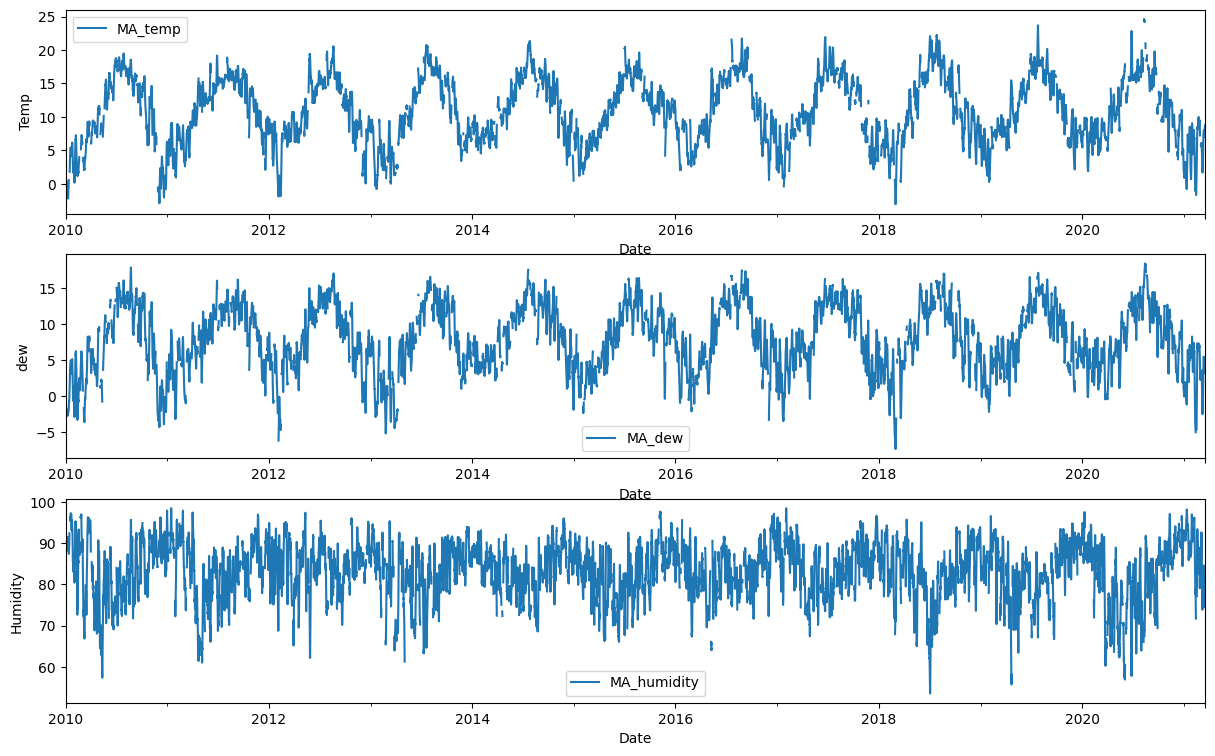

In [25]:
#Create Copy of the data
df_= train_df.copy()

plt.figure(figsize=(50,9))
# Plot the moving average of temperature
plt.subplot(3,3,1)
df_['MA_temp'] = train_df['temp'].rolling(window=3*24).mean()
df_['MA_temp'].plot()
plt.xlabel("Date")
plt.ylabel("Temp")
plt.legend()
# Plot the moving average of dew
plt.subplot(3,3,4)
df_['MA_dew'] = train_df['dew'].rolling(window=3*24).mean()
df_['MA_dew'].plot()
plt.xlabel("Date")
plt.ylabel("dew")
plt.legend()
# Plot the moving average of humidity
plt.subplot(3,3,7)
df_['MA_humidity'] = train_df['humidity'].rolling(window=3*24).mean()
df_['MA_humidity'].plot()
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.legend()

From the above plots :  

*   we can see the number of missing values for each year for (Temp, dew, Humidity)
*   Temp had the highest number of missing values in 2016, dew in 2021 and humidity in 2014


> **Imputation**

*   For these three features, the number of missing values is only 0.2%, which is considered a small percentage.

To fill in The missing values, there are many approaches, but I suggest two :

1.     by using this Equation to fill all The missing values with it :

 $Td = T - \frac{100 - RH}{5.0}$

Where

 $Td$ : dew point temperature

$T$ = Temperature

$RH$ = relative humidity

2.   by using interpoltion methods ( Linear , nearest , polynomial )


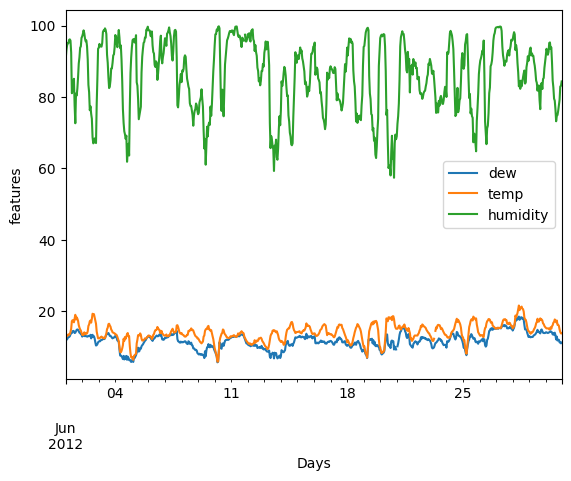

In [26]:
# plot the three features for one month
train_df.loc["2012-6"][["dew","temp","humidity"]].plot()
plt.xlabel("Days")
plt.ylabel("features")
plt.show()

The graph shows that the change in temp, humidity, and dew is linear and an indicator to interpolate with the linear method.

In [27]:
# Create A DataFrame containing the first 200 rows
df_test = train_df[["temp","dew","humidity"]].iloc[0:200,]
# Reset index
df_test.reset_index(drop=True, inplace=True)
# Create columns form missing value for each feature
df_test['temp_missing'] = df_test['temp']
df_test['dew_missing'] = df_test['dew']
df_test['humidity_missing'] = df_test['humidity']
# introduce missing value every 5th row for each feature
df_test.loc[df_test.index % 5 == 0, 'temp_missing'] = np.nan
df_test.loc[df_test.index % 5 == 0, 'dew_missing'] = np.nan
df_test.loc[df_test.index % 5 == 0, 'humidity_missing'] = np.nan

# Fill the missing values using the equation
df_test['Equation_temp'] = df_test['temp_missing'].fillna(df_test["dew"] +((100-df_test["humidity"])/5))
df_test["Equation_dew"] = df_test['dew_missing'].fillna(df_test["temp"]-((100-df_test["humidity"])/5))
df_test["Equation_humidity"]= df_test['humidity_missing'].fillna(100-(5*(df_test["temp"]-df_test["dew"])))

# Calculate the MSE for each feature
mse_temp = ((df_test["temp"]-df_test["Equation_temp"])**2).mean()
mse_dew = ((df_test["dew"]-df_test["Equation_dew"])**2).mean()
mse_humidity = ((df_test["humidity"]-df_test["Equation_humidity"])**2).mean()


print(f"MSE temp {mse_temp:.3f}, MSE dew {mse_dew:.3f}, MSE humidity {mse_humidity:.3f}")


MSE temp 0.077, MSE dew 0.078, MSE humidity 1.940


The MSE for imputing each feature using The Equation , The Next part will be imputing the missing value using interpolation

MSE polynomial 0.0369, MSE linear 0.0338, MSE nearest 0.1027


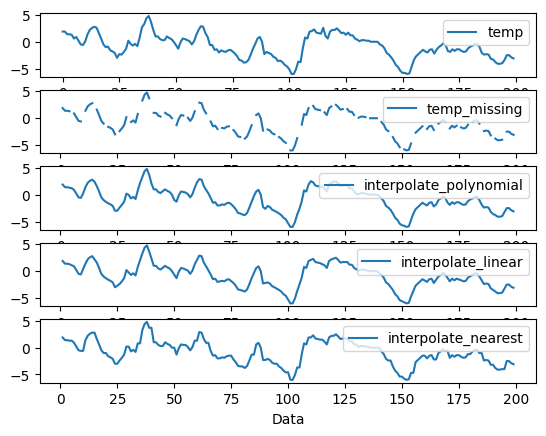

In [28]:
MSE_Interpoation("temp",train_df,consecutive_missing_values(train_df,"temp"))

MSE polynomial 0.2968, MSE linear 0.1605, MSE nearest 0.2447


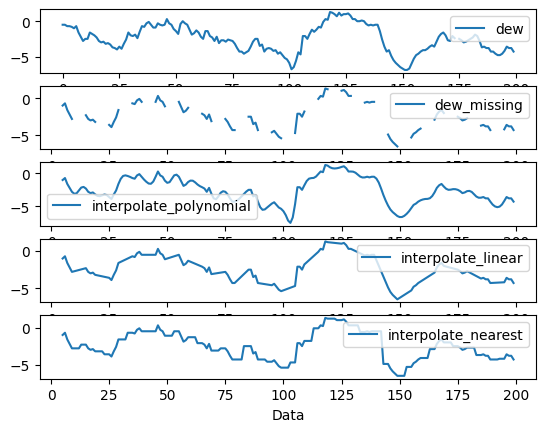

In [29]:
MSE_Interpoation("dew",train_df,consecutive_missing_values(train_df,"dew"))

In [30]:
MSE_Interpoation("humidity",train_df,consecutive_missing_values(train_df,"humidity"))

MSE polynomial 0.7540, MSE linear 0.6025, MSE nearest 1.3837


From the above graphs and MSE values for different imputing methods,
interpolation using linear had the best result for temp and humidity , and the equation gives the best MSE results for  dew.

In [31]:
# Perform linear interpolation on the 'temp' and 'humidity'
train_df['temp'].interpolate(method='linear',inplace=True)
train_df['humidity'].interpolate(method='linear',inplace=True)
#Fil the missing values in dew with the Equation
train_df['dew'].fillna(train_df["temp"]-((100-train_df["humidity"])/5),inplace=True)


In [32]:
train_df.isna().sum()

temp                    0
dew                     0
humidity                0
precip                217
precipprob            241
preciptype          91499
snow                32889
snowdepth           32886
windspeed             215
winddir               226
sealevelpressure      486
cloudcover            239
solarradiation        214
solarenergy           242
uvindex               235
Day                     0
Month                   0
Year                    0
DayOfYear               0
WeekOfYear              0
dtype: int64

# Wind direction and wind speed Missing Values imputation

In [33]:
# Number of missing values for wind speed and winddir
train_df[["winddir","windspeed",]].isna().sum()

winddir      226
windspeed    215
dtype: int64

In [34]:
plt.figure(figsize=(30,9))
plt.subplot(2,1,1)
# Plot the moving Average for windspeed
df_['MA_windspeed'] = train_df['windspeed'].rolling(window=3*24).mean()
df_['MA_windspeed'].plot()
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.legend()

plt.subplot(2,1,2)
# Plot the moving Average for winddir
df_['MA_winddir'] = train_df['winddir'].rolling(window=3*24).mean()
df_['MA_winddir'].plot()
plt.xlabel("Date")
plt.ylabel("Wind direction")
plt.legend()

wind speed have a high portioin of missing valus between 2018 - 2020

wind direction have a high portioin of missing valus in 2012, 2015, 2018

In [35]:
# Group by year and calculate the number of missing value for each feature
missing_values = train_df.groupby('Year')[["winddir","windspeed"]].apply(lambda x: x.isnull().sum()).reset_index()
# Reshape the data to be potted
missing_values_melthing = pd.melt(missing_values, id_vars=['Year'], value_vars=["winddir","windspeed"], var_name='Feature', value_name='Missing Values')

plt.figure(figsize=(10, 6))
# Plot the box plot
ax = sns.barplot(x='Year', y='Missing Values', hue='Feature', data=missing_values_melthing,palette=sns.color_palette("Set1"))

plt.title('Distribution of Missing Values per Year for Different Features')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.legend(title='Features')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

This graph confirms the previous assumption and shows that the highest missing values for wind direction are in 2018 and for wind speed in 2020

MSE polynomial 2.5722, MSE linear 2.6074, MSE nearest 2.9539


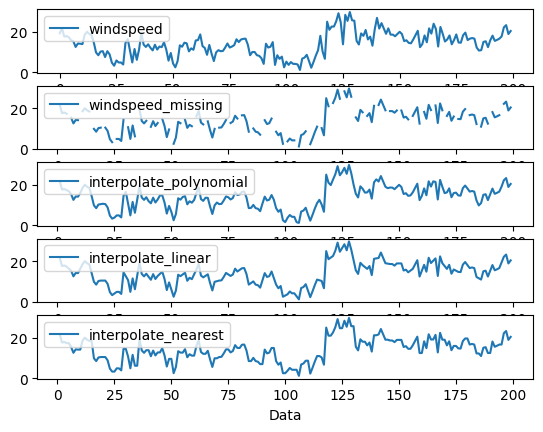

In [36]:
MSE_Interpoation("windspeed",train_df,consecutive_missing_values(train_df,"windspeed"))

MSE polynomial 3038.9424, MSE linear 1725.8869, MSE nearest 2088.6834


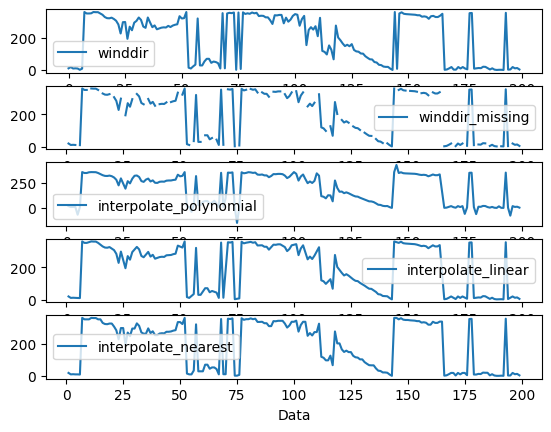

In [37]:
MSE_Interpoation("winddir",train_df,consecutive_missing_values(train_df,"winddir"))

From the above graphs and MSE values, it is recommended to use (polynomial with wind speed ) and (linear with wind direction ) for interpolation.

In [38]:
# Perform Polynomial interpolation on 'windspeed'
train_df['windspeed'].interpolate(method='polynomial',order=2,inplace=True)
# Perform linear interpolation on 'winddir'
train_df['winddir'].interpolate(method='linear',inplace=True)

In [39]:
# Check the number of missing values
train_df[["windspeed","winddir"]].isna().sum()

windspeed    0
winddir      0
dtype: int64

# Snow and Snow Depth Missing Values imputation

In [40]:
# Number of zero occurance to the total number of occurrences
train_df["snow"].value_counts()[0]/sum(train_df["snow"].value_counts())

0.9980576881901324

In [41]:
# Number of zero occurance to the total number of occurrences
train_df["snowdepth"].value_counts()[0]/sum(train_df["snowdepth"].value_counts())

0.9875361299301105

According to the table at the beginning of this section (Data Cleaning), snow and snow depth have 26% of missing values.

From the above two lines of codes :
*   99.8% of the values are zero for snow
*   98.75% of the values are zero for snow depth

The missing values were filled with zeros based on the majority of the values.

Another approach that can be utilised is dropping these two features, but it is better to keep them for now.

In the modelling section, I will check the model's performance with and without these features and see their effect on the model.

In [42]:
# Fill the missing values with zero
train_df["snow"].fillna(0,inplace=True)
train_df["snowdepth"].fillna(0,inplace=True)

In [43]:
# Checking the number of missing values
train_df[["snow","snowdepth"]].isna().sum()

snow         0
snowdepth    0
dtype: int64

# preciptype Missing Values imputation

In [44]:
# Calculate the number of missing value to whole data
train_df["preciptype"].isna().sum()/len(train_df)

0.9310506232510811

"The feature 'preciptype' will be removed from the dataset for the following reasons:
1. The percentage of missing values for this feature is 93.1%, which is a significant amount to impute.
2. All the information that can be obtained from this feature is already conveyed by other features in the dataset."

In [45]:
# Drop "preciptype" column
train_df.drop("preciptype",axis=1,inplace=True)
train_df.head()

temp  dew  humidity  precip  precipprob  snow  snowdepth  \
2010-01-01 00:00:00   1.9 -0.5     84.25   0.417       100.0   0.0        0.0   
2010-01-01 01:00:00   1.9 -0.5     83.90   0.000         0.0   0.0        0.0   
2010-01-01 02:00:00   1.4 -0.7     85.76   0.000         0.0   0.0        0.0   
2010-01-01 03:00:00   1.4 -0.7     85.69   0.000         0.0   0.0        0.0   
2010-01-01 04:00:00   1.3 -0.8     85.72   0.000         0.0   0.0        0.0   

                     windspeed  winddir  sealevelpressure  cloudcover  \
2010-01-01 00:00:00       19.4     11.0             999.9        62.2   
2010-01-01 01:00:00       21.8     19.0             999.8        22.4   
2010-01-01 02:00:00       17.7     10.0            1000.0        38.0   
2010-01-01 03:00:00       18.0     11.0            1000.2        66.7   
2010-01-01 04:00:00       17.4     10.0            1000.5        62.8   

                     solarradiation  solarenergy  uvindex  Day  Month  Year  \
2010-01-01 00:00:00             0.0          0.0      0.0    1      1  2010   
2010-01-01 01:00:00             0.0          0.0      0.0    1      1  2010   
2010-01-01 02:00:00             0.0          0.0      0.0    1      1  2010   
2010-01-01 03:00:00             0.0          0.0      0.0    1      1  2010   
2010-01-01 04:00:00             0.0          0.0      0.0    1      1  2010   

                     DayOfYear  WeekOfYear  
2010-01-01 00:00:00          1          53  
2010-01-01 01:00:00          1          53  
2010-01-01 02:00:00          1          53  
2010-01-01 03:00:00          1          53  
2010-01-01 04:00:00          1          53

# precip and precipprob Missing Values imputation

In [46]:
train_df.isna().sum()

temp                  0
dew                   0
humidity              0
precip              217
precipprob          241
snow                  0
snowdepth             0
windspeed             0
winddir               0
sealevelpressure    486
cloudcover          239
solarradiation      214
solarenergy         242
uvindex             235
Day                   0
Month                 0
Year                  0
DayOfYear             0
WeekOfYear            0
dtype: int64

In [47]:
# Number of zero occurance to the total number of occurrences
train_df["precip"].value_counts()[0]/len(train_df)

0.9290765708471127

In [48]:
# Number of zero occurance to the total number of occurrences
train_df["precipprob"].value_counts()[0]/len(train_df)

0.9287916560671585

Both precip and precipprob contrain 92% of the data as zero
either fill the data with zero or use one of the interpolation method



In [49]:
# Create A DataFrame containing the first 200 rows
df_test = train_df[["precip","precipprob"]].iloc[0:200,]
df_test.reset_index(drop=True, inplace=True)
# Create columns form missing value for each feature
df_test['precip_missing'] = df_test['precip']
df_test['precipprob_missing'] = df_test['precipprob']

# Introduce missing value every 5th row for each feature
df_test.loc[df_test.index % 5 == 0, 'precip_missing'] = np.nan
df_test.loc[df_test.index % 5 == 0, 'precipprob_missing'] = np.nan
# Fill the missing values with zero
df_test['precip_zero'] = df_test['precip_missing'].fillna(0)
df_test["precipprob_zero"] = df_test['precipprob_missing'].fillna(0)

# Calculate the MSE for each feature
mse_precipprob = ((df_test["precipprob"]-df_test["precipprob_zero"])**2).mean()
mse_precip = ((df_test["precip"]-df_test["precip_zero"])**2).mean()


print(f"MSE precipprob {mse_precipprob:.4f}, MSE precip {mse_precip:.4f}")


MSE precipprob 200.0000, MSE precip 0.0029


MSE polynomial 0.0041, MSE linear 0.0030, MSE nearest 0.0043


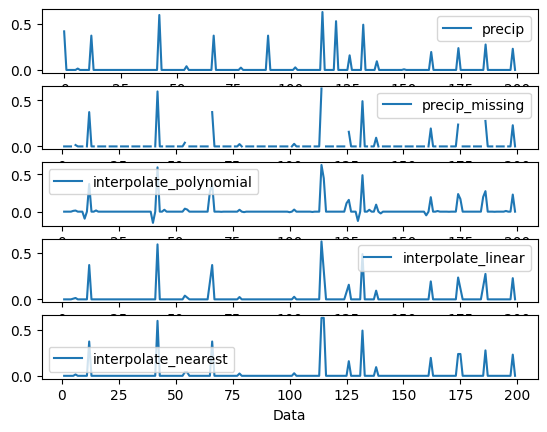

In [50]:
MSE_Interpoation("precip",train_df,consecutive_missing_values(train_df,"precip"))

MSE polynomial 1423.9828, MSE linear 564.1026, MSE nearest 564.1026


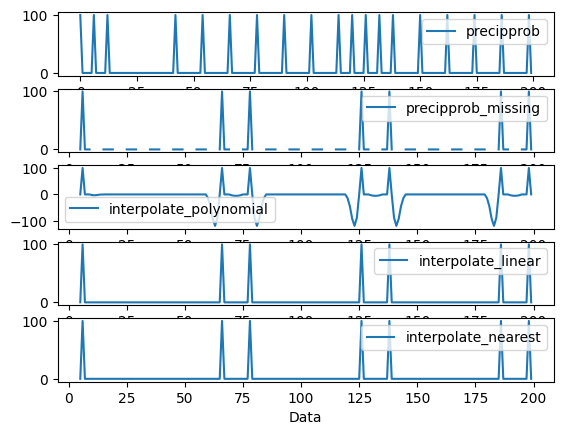

In [51]:
MSE_Interpoation("precipprob",train_df,consecutive_missing_values(train_df,"precipprob"))

From MSE values for filling with zero and interpolation, filling the precippob and precip with zeros is more reasonable.

In [52]:
# Filling missing values with zero
train_df["precipprob"].fillna(0,inplace=True)
train_df["precip"].fillna(0,inplace=True)
train_df[["precip","precipprob"]].isna().sum()

precip        0
precipprob    0
dtype: int64

# Sea level pressure and Cloud Cover Missing values imputation

Text(0, 0.5, 'sealevelpressure')

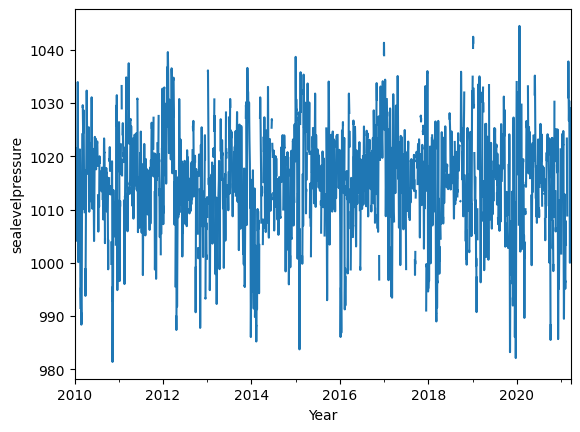

In [53]:
# Plot the moving average for sea level pressure
df_['MA_sealevelpressure'] = train_df['sealevelpressure'].rolling(window=3*24).mean()
df_['MA_sealevelpressure'].plot()
plt.xlabel("Year")
plt.ylabel("sealevelpressure")

From the graph, there is a high portion of missing values in 2018 and 2021

<Axes: xlabel='sealevelpressure', ylabel='Count'>

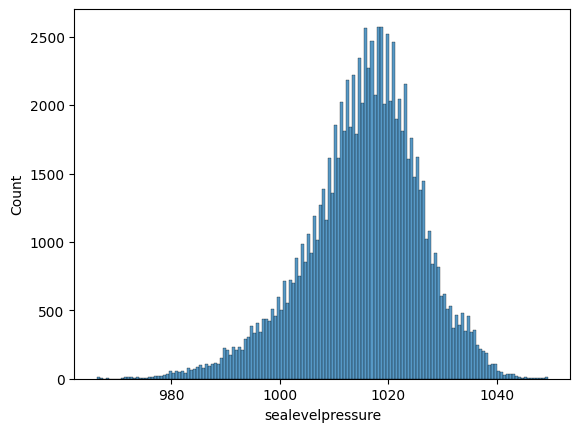

In [54]:
# Plot Histogram
sns.histplot(train_df["sealevelpressure"])

The histogram shows normal distribution in sea level pressure feature, and the values are in the normal range between 950 millibars and 1050 millibars [2]

In this case, the best interpolation method might be linear or polynomial.

MSE polynomial 0.0727, MSE linear 0.0699, MSE nearest 0.4287


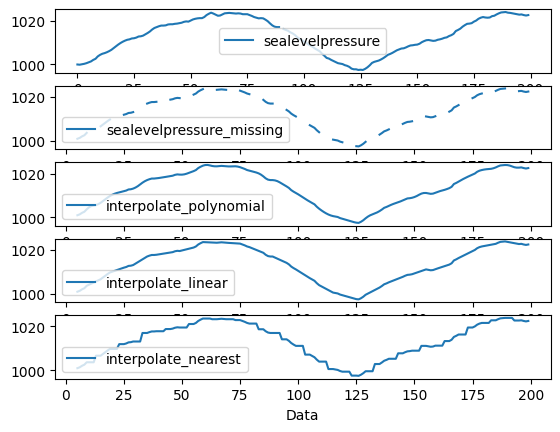

In [55]:
MSE_Interpoation("sealevelpressure",train_df,consecutive_missing_values(train_df,"sealevelpressure"))

from the graph and MSE values, it shows that the best method for interpolation is linear

In [56]:
# Perform the missing values with linear interpolation
train_df["sealevelpressure"].interpolate(method="linear",inplace=True)

MSE polynomial 178.5941, MSE linear 127.2927, MSE nearest 162.4807


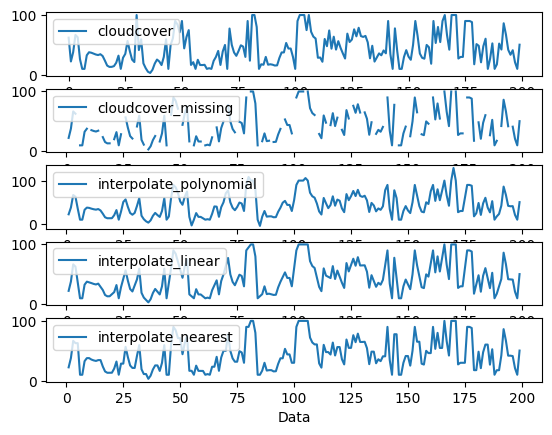

In [57]:
MSE_Interpoation("cloudcover",train_df,consecutive_missing_values(train_df,"cloudcover"))

The best interpolation method for cloud cover is linear, as shown in the graph and MSE values.


In [58]:
# Perform the missing values with linear interpolation
train_df["cloudcover"].interpolate(method="linear",inplace=True)

In [59]:
train_df[["sealevelpressure","cloudcover"]].isna().sum()

sealevelpressure    0
cloudcover          0
dtype: int64

# UV , Solar Radiation and Solar Energy Missing Values Imputation

In [60]:
# Checking the missing values for the three feature
train_df[["solarradiation","solarenergy","uvindex"]].isna().sum()

solarradiation    214
solarenergy       242
uvindex           235
dtype: int64

Text(0, 0.5, 'solarradiation')

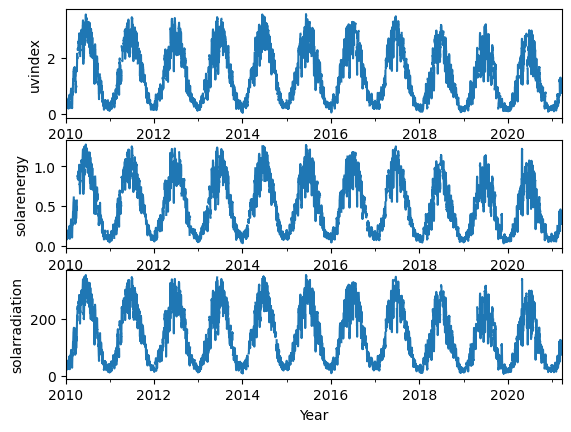

In [61]:
plt.subplot(3,1,1)
# Plot the moving average for UV index
df_['MA_uvindex'] = train_df['uvindex'].rolling(window=3*24).mean()
df_['MA_uvindex'].plot()
plt.xlabel("Year")
plt.ylabel("uvindex")

plt.subplot(3,1,2)
# Plot the moving average for Solar energy
df_['MA_solarenergy'] = train_df['solarenergy'].rolling(window=3*24).mean()
df_['MA_solarenergy'].plot()
plt.xlabel("Year")
plt.ylabel("solarenergy")

plt.subplot(3,1,3)
# Plot the moving average for Solar radiation
df_['MA_solarradiation'] = train_df['solarradiation'].rolling(window=3*24).mean()
df_['MA_solarradiation'].plot()
plt.xlabel("Year")
plt.ylabel("solarradiation")

The graph shows that the three features are highly correlated, and all have a seasonal trend. Based on the data plot, it appears that polynomial interpolation would be an excellent fit for the data.

"What fits one of them would probably fit perfectly on the others"

In [62]:
MSE_Interpoation("solarradiation",train_df,consecutive_missing_values(train_df,"solarradiation"))

MSE polynomial 7.4532, MSE linear 23.3225, MSE nearest 101.8351


MSE polynomial 0.0978, MSE linear 0.0861, MSE nearest 0.1082


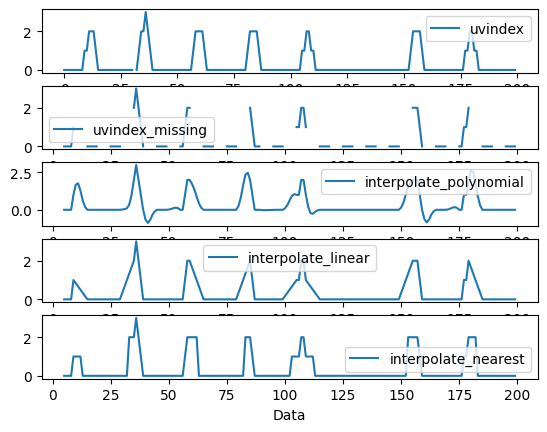

In [63]:
MSE_Interpoation("uvindex",train_df,consecutive_missing_values(train_df,"uvindex"))

MSE polynomial 0.0062, MSE linear 0.0090, MSE nearest 0.0135


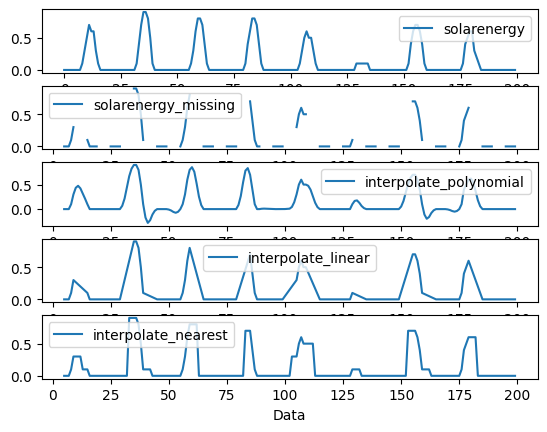

In [64]:
MSE_Interpoation("solarenergy",train_df,consecutive_missing_values(train_df,"solarenergy"))

Based on the analysis of graphs and MSE:

it was found that MSE polynomial had the lowest value for solar energy and solar radiation, while MSE linear was the lowest for the UV index

since all of these features are highly correlated, it was decided to use polynomial interpolation on all of them.

In [65]:
# Perform Polynomial interpolation for the three Features
train_df["solarradiation"].interpolate(method="polynomial",order=2,inplace=True)
train_df["solarenergy"].interpolate(method="polynomial",order=2,inplace=True)
train_df["uvindex"].interpolate(method="polynomial",order=2,inplace=True)

In [66]:
train_df.isna().sum()

temp                0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
uvindex             0
Day                 0
Month               0
Year                0
DayOfYear           0
WeekOfYear          0
dtype: int64

# **EDA**

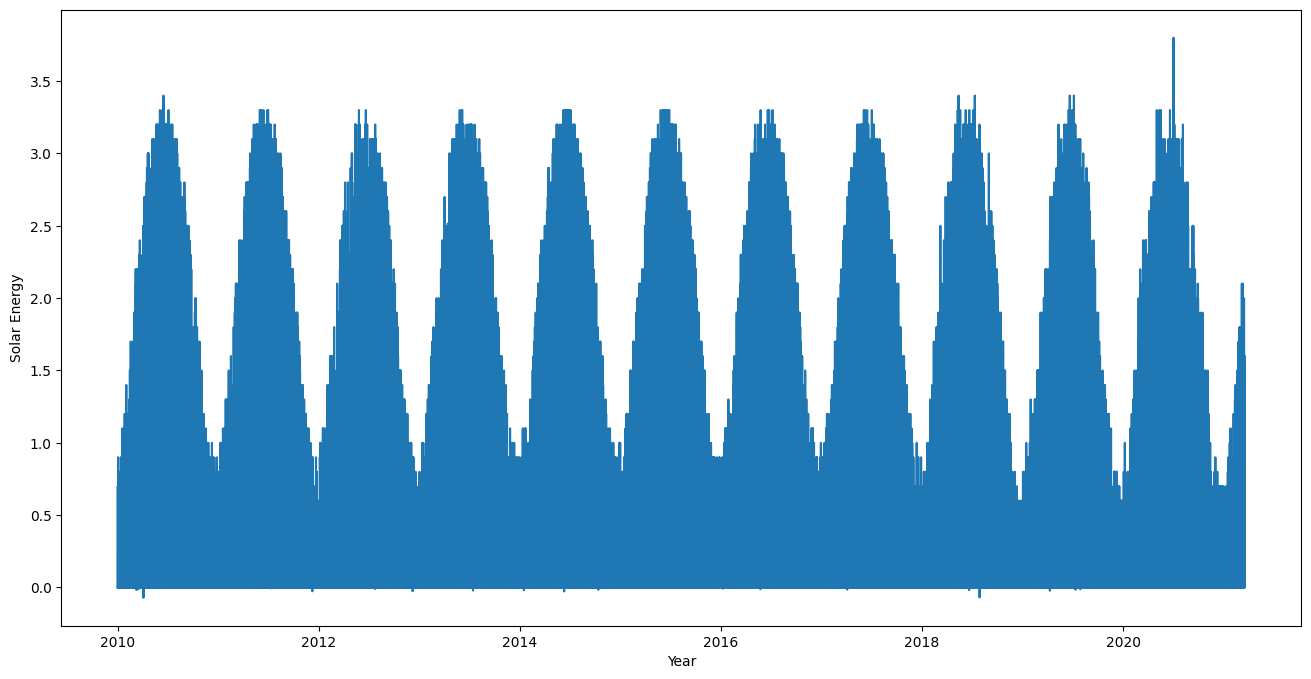

In [67]:
plt.figure(figsize=(16,8))
# Plotting the 'solarenergy' column against the index
plt.plot(train_df.index, train_df['solarenergy'])
# Set the labels for x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Solar Energy')
plt.show()

It can be concluded from the graph that there is a seasonal pattern in solar energy throughout the years.

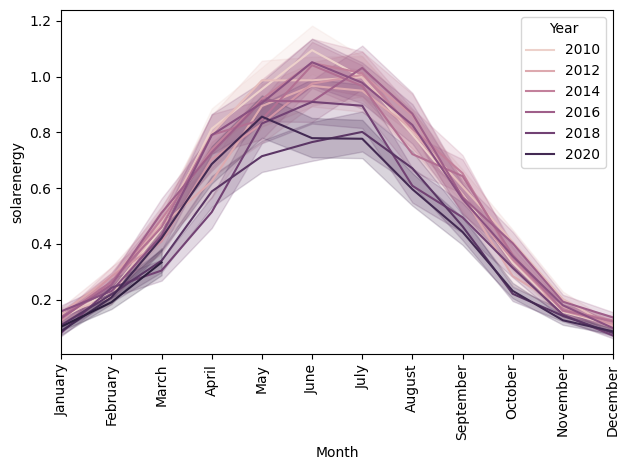

In [68]:
# Define a list of month names
months_of_the_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# plot line plot
sns.lineplot(x='Month', y='solarenergy', data=train_df, hue='Year')
_=plt.xticks(np.arange(1, 13), months_of_the_year, rotation=90)
# Set the x-axis limit from 1 to 12
_=plt.xlim(1, 12)
_=plt.tight_layout()
plt.show()

The graph shows an increase in Solar energy in summer and a decrease in winter, which is logical.

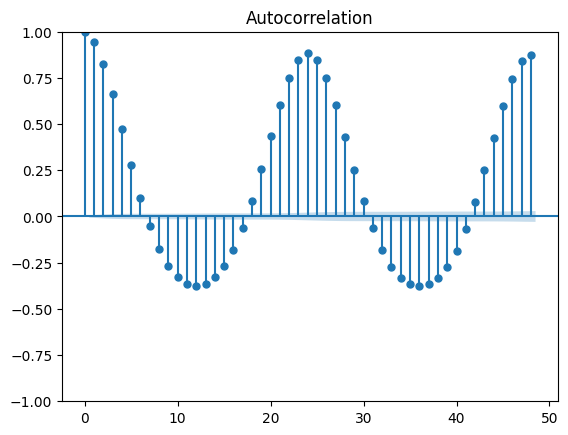

In [69]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot the autocorrelation function (ACF) for solar energy
plot_acf(train_df["solarenergy"],lags=48)
plt.show()

The graph shows a high autocorrelation for the first 4 hours, with a subsequent increase at the same time yesterday.

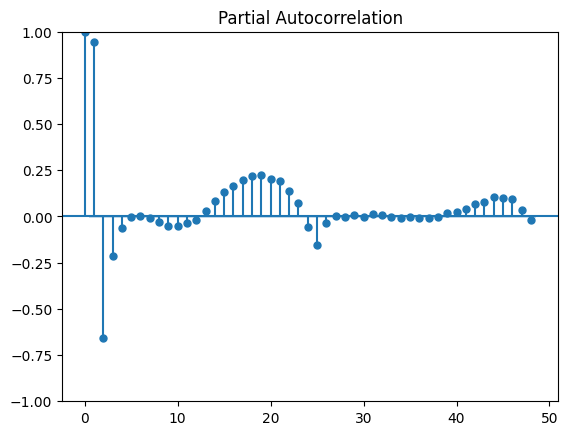

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf
# Plot the partial autocorrelation function (PACF) for solar energy
plot_pacf(train_df["solarenergy"],lags=48)
plt.show()

There is a high partial autocorrelation for the first and second hours. After two hours, the best partial autocorrelation occurs at 24 hours, 48 hours, and probably 72 hours, but it decreases over time.

In [71]:
from statsmodels.tsa.stattools import adfuller
# Perform the Augmented Dickey-Fuller test on the 'solarenergy'
adf_result = adfuller(train_df["solarenergy"])
print('ADF Statistic %.2f:' % adf_result[0]) # should be big and negative
print('p-value: %.4f:' % adf_result[1])

ADF Statistic -9.73:
p-value: 0.0000:


Since the p-value < 0.05 means, we can reject the null hypothesis (time series is not stationary ). Moreover, the ADF value is significant and negative, which suggests the time series is stationary.

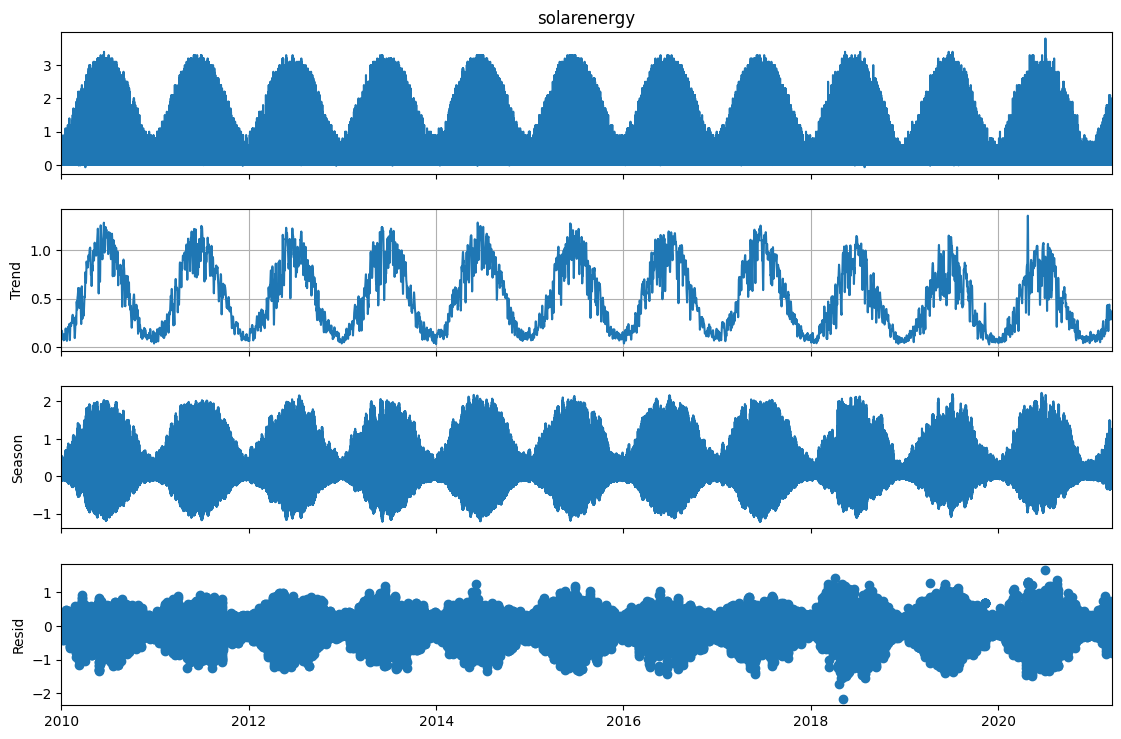

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
# Perform Seasonal-Trend decomposition on the 'solarenergy'
decomposition = STL(train_df['solarenergy'],period=48).fit()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.axes[1].grid()

The Graph shows
- There is a seasonal pattern that occurs every year.
- The Trend is stable untill 2017 after that, there is a small decreases
- The residuals are within 2 MJ/m2 and symmetrically distributed around 0


# **Energy Calculation and Assumptions**

# **Renewable Energy**
Renewable energy is energy derived from natural sources that are replenished at a higher rate than they are consumed. Sunlight and wind, for example, are such sources that are constantly being replenished. Renewable energy sources are plentiful all around us.[3]


>#  **Solar Energy :**

The dataset features "Solar Energy" in MJ/m2, which we need to convert to GWH (Gigawatt Hours). To do that, some assumptions were made:

- The Area of the Solar Farm which produce the Energy

   According to [4], The solar farm area is usually between 125 to 200 acres. The assumed Farm will have an area of 125 acres.


- Power Loss

  no loss in power, and the whole farm generates power.


$Solar Power(MJ/m2) = ( Solar Energy × Area (meters) ) * 2.77777778 × 10^-7$ $(GWH)$


># **Wind Power**

Several assumptions were made to calculate the wind power.

*   neglection of any designing factors that might affect the power generation
*   The number of wind turbines in the farm is set to be 50 wind turbine according to the average number of turbines in a wind farm  [5]


$Wind Power(GWH) = 1/2 * ρ * A * $V$^3$ $(m/s)$ $ * 1.0 * 10^-$$^9$ $ *  8760 * 50$


$Where$

- ρ (rho, a Greek letter) = density of the air in kg/m3 = 1.225 kg/m3

- A = cross-sectional area of the wind in m2 = 2.11 m2

- v = velocity of the wind in m/s

The Equation is taken from [6][7]




> $Total Energy = Wind Power + Solar Power$









In [73]:
# Make a copy of the data
train_df_copy = train_df.copy()
# Conversion factors
acre_to_m2 = 4046.856422
MJ_to_GWH = 2.77777778 * (10**(-7))
# Area of the Farm
Area = 125
# Solar Power in GWH based on solar energy
train_df_copy["Solar Power GwH"]=(train_df_copy["solarenergy"]) * Area * acre_to_m2 * MJ_to_GWH

In [74]:
# Conversion factors
khp_to_meter_per_second = 0.277777778
GW_to_GWH = 8760
W_to_Gw =10**(-9)

# Constant
A = 2.11
rho = 1.225
number_of_turbine = 50
# Wind Power in GWH based on wind speed
train_df_copy["Wind Power GWH"] = 0.5 * (rho) * (A) * ((train_df_copy["windspeed"]*khp_to_meter_per_second)**3) *(W_to_Gw)*(GW_to_GWH)*(number_of_turbine)
train_df_copy

temp  dew  humidity  precip  precipprob  snow  snowdepth  \
2010-01-01 00:00:00   1.9 -0.5     84.25   0.417       100.0   0.0        0.0   
2010-01-01 01:00:00   1.9 -0.5     83.90   0.000         0.0   0.0        0.0   
2010-01-01 02:00:00   1.4 -0.7     85.76   0.000         0.0   0.0        0.0   
2010-01-01 03:00:00   1.4 -0.7     85.69   0.000         0.0   0.0        0.0   
2010-01-01 04:00:00   1.3 -0.8     85.72   0.000         0.0   0.0        0.0   
...                   ...  ...       ...     ...         ...   ...        ...   
2021-03-18 14:00:00   8.6  5.0     78.18   0.000         0.0   0.0        0.0   
2021-03-18 15:00:00   8.8  4.5     74.46   0.000         0.0   0.0        0.0   
2021-03-18 16:00:00   8.8  4.7     75.45   0.000         0.0   0.0        0.0   
2021-03-18 17:00:00   8.5  5.2     79.95   0.000         0.0   0.0        0.0   
2021-03-18 18:00:00   8.5  5.4     81.02   0.148       100.0   0.0        0.0   

                     windspeed  winddir  sealevelpressure  ...  \
2010-01-01 00:00:00       19.4     11.0             999.9  ...   
2010-01-01 01:00:00       21.8     19.0             999.8  ...   
2010-01-01 02:00:00       17.7     10.0            1000.0  ...   
2010-01-01 03:00:00       18.0     11.0            1000.2  ...   
2010-01-01 04:00:00       17.4     10.0            1000.5  ...   
...                        ...      ...               ...  ...   
2021-03-18 14:00:00       14.7     13.0            1027.9  ...   
2021-03-18 15:00:00       13.0    353.0            1027.3  ...   
2021-03-18 16:00:00       18.1    352.0            1026.7  ...   
2021-03-18 17:00:00       13.3    350.0            1026.2  ...   
2021-03-18 18:00:00        7.6    318.0            1025.6  ...   

                     solarradiation  solarenergy  uvindex  Day  Month  Year  \
2010-01-01 00:00:00             0.0          0.0      0.0    1      1  2010   
2010-01-01 01:00:00             0.0          0.0      0.0    1      1  2010   
2010-01-01 02:00:00             0.0          0.0      0.0    1      1  2010   
2010-01-01 03:00:00             0.0          0.0      0.0    1      1  2010   
2010-01-01 04:00:00             0.0          0.0      0.0    1      1  2010   
...                             ...          ...      ...  ...    ...   ...   
2021-03-18 14:00:00           227.0          0.8      2.0   18      3  2021   
2021-03-18 15:00:00           141.0          0.5      1.0   18      3  2021   
2021-03-18 16:00:00           128.0          0.5      1.0   18      3  2021   
2021-03-18 17:00:00            55.0          0.2      1.0   18      3  2021   
2021-03-18 18:00:00            18.0          0.1      0.0   18      3  2021   

                     DayOfYear  WeekOfYear  Solar Power GwH  Wind Power GWH  
2010-01-01 00:00:00          1          53         0.000000        0.088585  
2010-01-01 01:00:00          1          53         0.000000        0.125697  
2010-01-01 02:00:00          1          53         0.000000        0.067278  
2010-01-01 03:00:00          1          53         0.000000        0.070758  
2010-01-01 04:00:00          1          53         0.000000        0.063915  
...                        ...         ...              ...             ...  
2021-03-18 14:00:00         77          11         0.112413        0.038540  
2021-03-18 15:00:00         77          11         0.070258        0.026655  
2021-03-18 16:00:00         77          11         0.070258        0.071943  
2021-03-18 17:00:00         77          11         0.028103        0.028544  
2021-03-18 18:00:00         77          11         0.014052        0.005326  

[98275 rows x 21 columns]

In [75]:
# Total Generated Power
train_df_copy["Total Generated Power(GWH)"]=train_df_copy["Solar Power GwH"]+train_df_copy["Wind Power GWH"]

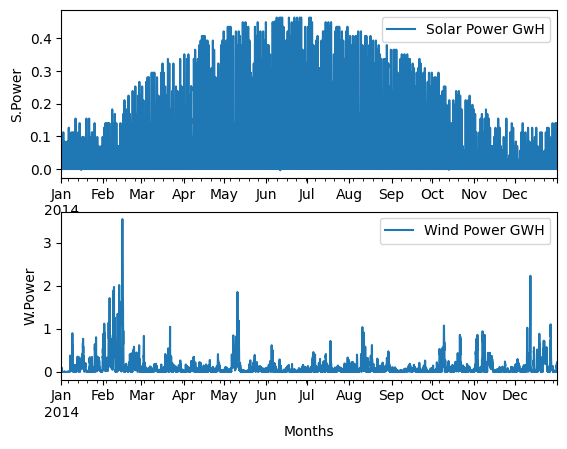

In [76]:
plt.subplot(2,1,1)
# Plot solar power for the year 2014
train_df_copy["Solar Power GwH"].loc["2014"].plot()
plt.xlabel("Months")
plt.ylabel("S.Power")
plt.legend()
# Plot wind power for the year 2014
plt.subplot(2,1,2)
train_df_copy["Wind Power GWH"].loc["2014"].plot()
plt.xlabel("Months")
plt.ylabel("W.Power")
plt.legend()


This Graph shows the power generation levels for both Solar and Wind energy thourghout the year .

*   In the month of Nov, Dec, Jan and Feb, wind energy generation is high due to strong winter winds.

*   Solar Energy production increases from March and hits its peak in June ( Summer ), then gradually decreases.


<Axes: >

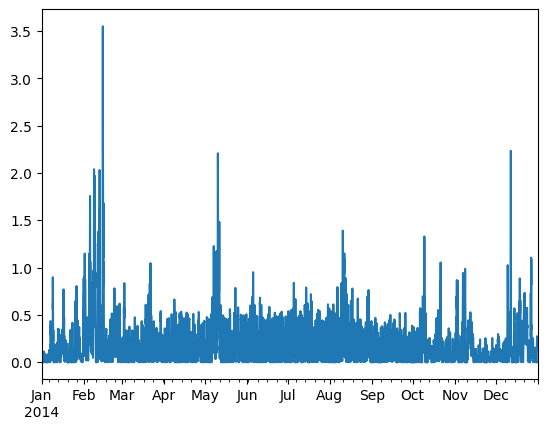

In [77]:
train_df_copy["Total Generated Power(GWH)"].loc["2014"].plot()


*   This graph illustrates that power generation experiences spikes at the beginning and end of the year, primarily due to high wind energy. However, overall, it is not stable. However,

*   from March to September, electricity production remains relatively stable with high generation from March to September.


# **Energy Generation and Consumption Assumptions**

# **Energy Generation**

According To Uk governmental data

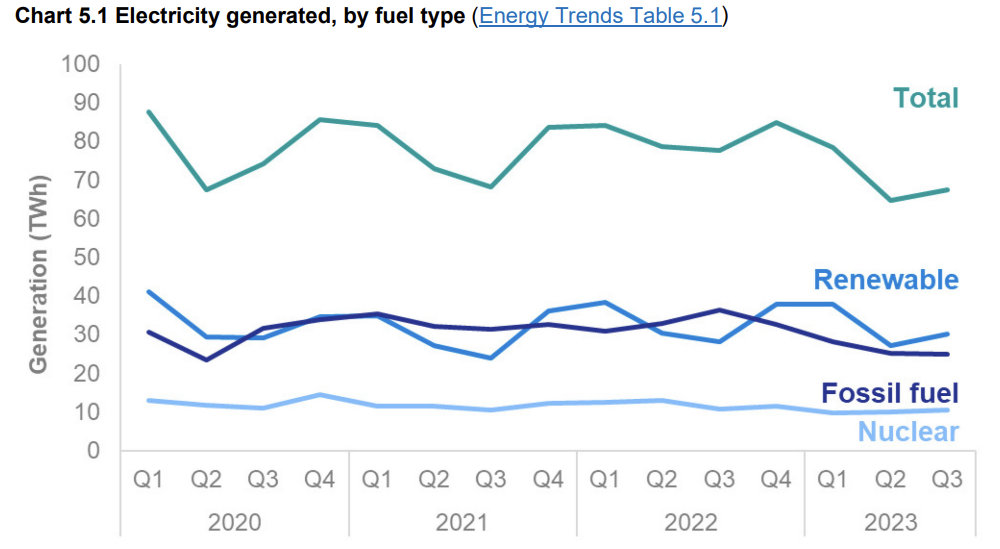
                   Fig. 1. Energy Generation.

The graph illustrates the generated power in the UK for the last three years[8]; it can be observed that the renewable line follows the above graph patterns, Where the generated renewable energy is high at the beginning and end of the year while it is relatively low in the second and third quarters.

# **Energy Consumption Assumptions**

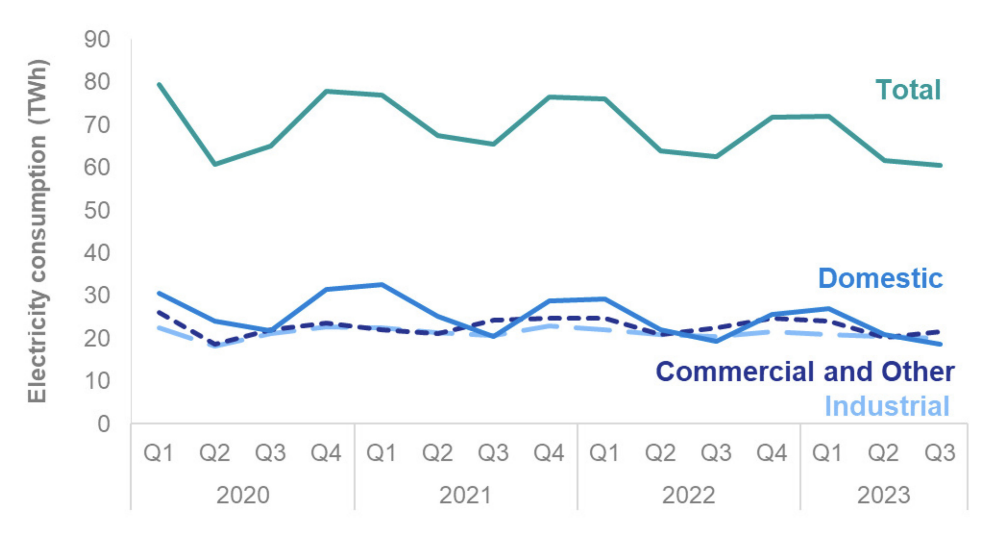
Fig. 2. Energy Consumption

- Based on the graph[8], it can be concluded that the consumption of energy increases in the first and last quarterers, while it decreases in the second and third.

- Based on our case study and data, we have found that energy generation is high in the first and last quarters, yet there is also an increase in energy consumption in these periods. Therefore, there might be no surplus of energy available. However, during the second and third quarters, there is lower consumption but relatively high solar energy generation, which could lead to a surplus of energy.

# **Brighton Power Consumption Data**

According to UK governmental data [9], This data contains the yearly energy consumption for all UK cities, including Brighton. A file was created to record the energy usage from 2010 to 2021

In [78]:
#Load Brighton consumption file
Brighton_cousumption = pd.read_excel("Brighton Consumption.xlsx")
Brighton_cousumption.head(14)

Year  Consumption
0   2010         90.6
1   2011         88.1
2   2012         88.4
3   2013         87.7
4   2014         88.2
5   2015         87.4
6   2016         82.2
7   2017         83.6
8   2018         81.8
9   2019         79.8
10  2020         71.3
11  2021         72.0
12  2022          NaN
13  2023          NaN

<Axes: xlabel='Year'>

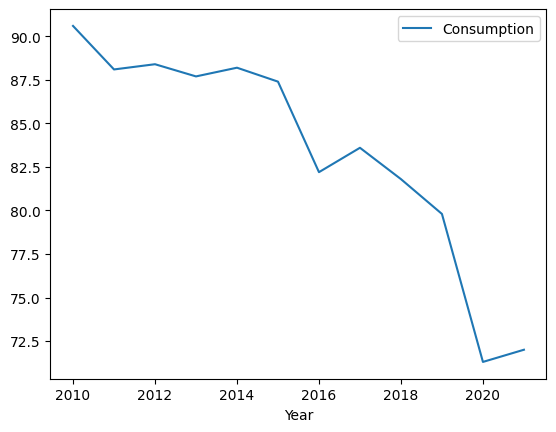

In [79]:
# Plot Brighton consumption
Brighton_cousumption.plot(x="Year",y="Consumption")

The graph shows that Brighton's energy consumption has decreased over the years.

In [80]:
# Perfrom linear interpolation
Brighton_cousumption.interpolate(method="linear",inplace=True)

Filled the last missing values with linear interpolation

# **Surplus of Energy**

72 GWH has been decided as the yearly consumption for Brighton

- To determine the monthly consumption, we need to factor in the difference in consumption between winter and summer. " Because consumption in the winter is higher than in summer."

 60% of the yearly consumption was assigned to the first and last quarters of the year and 40% to the second and third quarters.

- Then, from the monthly consumption, we get the hourly consumption.

  Note: The consumption in the day might be different, but for simplicity, I ignored that

- We subtract the hourly power consumption from the total generated power to calculate the difference.

  If the subtraction is positive, there is a surplus of power; otherwise, there is no surplus of energy.

  ** I applied that on the training dataset as an example


In [81]:
# Define hourly power consumption based on the months
train_df_copy['hourly_power_consumption'] = np.where(
    ((train_df_copy['Month'] == 1) | (train_df_copy['Month'] == 2) | (train_df_copy['Month'] == 3) |
     (train_df_copy['Month'] == 10) | (train_df_copy['Month'] == 11) | (train_df_copy['Month'] == 12)),
    0.24,  # For months January, February, March, October, November, December
    0.16   # For other months
)


In [82]:
# Calculate the power difference
train_df_copy["Power difference"] = train_df_copy["Total Generated Power(GWH)"]- train_df_copy["hourly_power_consumption"]

In [83]:
# Create a new column to indicate surplus of energy (True - False)
train_df_copy["surplus_of_energy"] =train_df_copy['Power difference'] > 0
train_df_copy

temp  dew  humidity  precip  precipprob  snow  snowdepth  \
2010-01-01 00:00:00   1.9 -0.5     84.25   0.417       100.0   0.0        0.0   
2010-01-01 01:00:00   1.9 -0.5     83.90   0.000         0.0   0.0        0.0   
2010-01-01 02:00:00   1.4 -0.7     85.76   0.000         0.0   0.0        0.0   
2010-01-01 03:00:00   1.4 -0.7     85.69   0.000         0.0   0.0        0.0   
2010-01-01 04:00:00   1.3 -0.8     85.72   0.000         0.0   0.0        0.0   
...                   ...  ...       ...     ...         ...   ...        ...   
2021-03-18 14:00:00   8.6  5.0     78.18   0.000         0.0   0.0        0.0   
2021-03-18 15:00:00   8.8  4.5     74.46   0.000         0.0   0.0        0.0   
2021-03-18 16:00:00   8.8  4.7     75.45   0.000         0.0   0.0        0.0   
2021-03-18 17:00:00   8.5  5.2     79.95   0.000         0.0   0.0        0.0   
2021-03-18 18:00:00   8.5  5.4     81.02   0.148       100.0   0.0        0.0   

                     windspeed  winddir  sealevelpressure  ...  Month  Year  \
2010-01-01 00:00:00       19.4     11.0             999.9  ...      1  2010   
2010-01-01 01:00:00       21.8     19.0             999.8  ...      1  2010   
2010-01-01 02:00:00       17.7     10.0            1000.0  ...      1  2010   
2010-01-01 03:00:00       18.0     11.0            1000.2  ...      1  2010   
2010-01-01 04:00:00       17.4     10.0            1000.5  ...      1  2010   
...                        ...      ...               ...  ...    ...   ...   
2021-03-18 14:00:00       14.7     13.0            1027.9  ...      3  2021   
2021-03-18 15:00:00       13.0    353.0            1027.3  ...      3  2021   
2021-03-18 16:00:00       18.1    352.0            1026.7  ...      3  2021   
2021-03-18 17:00:00       13.3    350.0            1026.2  ...      3  2021   
2021-03-18 18:00:00        7.6    318.0            1025.6  ...      3  2021   

                     DayOfYear  WeekOfYear  Solar Power GwH  Wind Power GWH  \
2010-01-01 00:00:00          1          53         0.000000        0.088585   
2010-01-01 01:00:00          1          53         0.000000        0.125697   
2010-01-01 02:00:00          1          53         0.000000        0.067278   
2010-01-01 03:00:00          1          53         0.000000        0.070758   
2010-01-01 04:00:00          1          53         0.000000        0.063915   
...                        ...         ...              ...             ...   
2021-03-18 14:00:00         77          11         0.112413        0.038540   
2021-03-18 15:00:00         77          11         0.070258        0.026655   
2021-03-18 16:00:00         77          11         0.070258        0.071943   
2021-03-18 17:00:00         77          11         0.028103        0.028544   
2021-03-18 18:00:00         77          11         0.014052        0.005326   

                     Total Generated Power(GWH)  hourly_power_consumption  \
2010-01-01 00:00:00                    0.088585                      0.24   
2010-01-01 01:00:00                    0.125697                      0.24   
2010-01-01 02:00:00                    0.067278                      0.24   
2010-01-01 03:00:00                    0.070758                      0.24   
2010-01-01 04:00:00                    0.063915                      0.24   
...                                         ...                       ...   
2021-03-18 14:00:00                    0.150952                      0.24   
2021-03-18 15:00:00                    0.096913                      0.24   
2021-03-18 16:00:00                    0.142201                      0.24   
2021-03-18 17:00:00                    0.056647                      0.24   
2021-03-18 18:00:00                    0.019378                      0.24   

                     Power difference  surplus_of_energy  
2010-01-01 00:00:00         -0.151415              False  
2010-01-01 01:00:00         -0.114303              False  
2010-01-01 02:00:00         -0.172722           

In [84]:
# Save Surplus of power for the training dataset
train_df_copy.drop(train_df_copy.columns[:19],axis=1).to_csv("Train_Surplus_energy.csv")

# **Notes**
- for Testing data, it will be cleaned before modelling which is the next assignment


# **Testing Dataset**

To ensure consistency and insure no data leakage, the Testing Dataset will undergo a similar preprocessing pipeline as the Training Set. The following steps will be undertaken:

> Missing Value imputation:

- Testing dataset will be examined to identify features that contain missing values.

- Employ the same imputation techniques that were used for each individual feature in the Training Set, to ensure consistent handling of missing data across both the Training and Testing datasets.


> Feature Engineering:

- Add the new columns that were created during the preprocessing of the Training Set.

- remove any columns that were dropped from the Training Set.

Align the feature sets of both datasets is important to ensure consistency in the input data for modeling and evaluation.

In [85]:
# Number of Missing value for each feature
test_df.isna().sum()

temp                   50
dew                    62
humidity               56
precip                 76
precipprob             59
preciptype          20073
snow                  155
snowdepth             689
windspeed              60
winddir                65
sealevelpressure       53
cloudcover             63
solarradiation        130
solarenergy           136
uvindex               137
Day                     0
Month                   0
Year                    0
DayOfYear               0
WeekOfYear              0
dtype: int64

This table summarizes the preprocessing techniques that have been applied to each feature in the Training Set. The same preprocessing methods will be employed for the Testing Set to ensure consistency and maintain data integrity across both datasets.


\begin{array}{|c|c|}
\hline
\textbf{Feature} & \textbf{Imputation method} \\
\hline
\text{temp} & \text{Linear} \\
\hline
\text{dew} & \text{Equation} \\
\hline
\text{humidity} & \text{Linear} \\
\hline
\text{windspeed} & \text{Polynomial} \\
\hline
\text{winddir} & \text{Polynomial} \\
\hline
\text{snow} & \text{Filled With Zero} \\
\hline
\text{snowdepth} & \text{Filled With Zero} \\
\hline
\text{precipprob} & \text{Filled with Zero} \\
\hline
\text{precip} & \text{Filled with Zero} \\
\hline
\text{preciptype} & \text{dropped} \\
\hline
\text{sealevelpressure} & \text{Linear} \\
\hline
\text{cloudcover} & \text{Linear} \\
\hline
\text{uvindex} & \text{Polynomial} \\
\hline
\text{solarenergy} & \text{Polynomial} \\
\hline
\text{solarradiation} & \text{Polynomial} \\
\hline
\end{array}


In [86]:
# fill the missing values using different interpolation method
test_df["temp"].interpolate(method="linear",inplace=True)
test_df["humidity"].interpolate(method="linear",inplace=True)
test_df["windspeed"].interpolate(method="polynomial",order=2,inplace=True)
test_df["winddir"].interpolate(method="polynomial",order=2,inplace=True)
test_df["sealevelpressure"].interpolate(method="linear",inplace=True)
test_df["cloudcover"].interpolate(method="linear",inplace=True)
test_df["uvindex"].interpolate(method="polynomial",order=2,inplace=True)
test_df["solarradiation"].interpolate(method="polynomial",order=2,inplace=True)
test_df["solarenergy"].interpolate(method="polynomial",order=2,inplace=True)

# Fill the Missing Value with the above equation
test_df["dew"].fillna(test_df["temp"]-((100-test_df["humidity"])/5),inplace=True)

# Fill the missing values with zero
test_df["snow"].fillna(0,inplace=True)
test_df["snowdepth"].fillna(0,inplace=True)
test_df["precip"].fillna(0,inplace=True)
test_df["precipprob"].fillna(0,inplace=True)
# Drop preciptype
test_df.drop("preciptype",axis=1,inplace=True)



In [87]:
test_df.isna().sum()

temp                0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
uvindex             0
Day                 0
Month               0
Year                0
DayOfYear           0
WeekOfYear          0
dtype: int64

# **Energy Generation and Consumption for Testing Dataset**

In this section, we will apply the same assumption as in the previous section to calculate the generated and consumed power and determine the surplus of power.

**Refer to the previous sections for detailed information about the assumptions.**

In [88]:
# Make a copy of the data
test_df_copy = test_df.copy()
test_df_copy["Solar Power GwH"]=(test_df_copy["solarenergy"]) * Area * acre_to_m2 * MJ_to_GWH

# Wind Power in GWH based on wind speed
test_df_copy["Wind Power GWH"] = 0.5 * (rho) * (A) * ((test_df_copy["windspeed"]*khp_to_meter_per_second)**3) *(W_to_Gw)*(GW_to_GWH)*(number_of_turbine)

# Total Generated Power
test_df_copy["Total Generated Power(GWH)"]=test_df_copy["Solar Power GwH"]+test_df_copy["Wind Power GWH"]

# Define hourly power consumption based on the months
test_df_copy['hourly_power_consumption'] = np.where(
    ((test_df_copy['Month'] == 1) | (test_df_copy['Month'] == 2) | (test_df_copy['Month'] == 3) |
     (test_df_copy['Month'] == 10) | (test_df_copy['Month'] == 11) | (test_df_copy['Month'] == 12)),
    0.24,  # For months January, February, March, October, November, December
    0.16   # For other months
)

# Calculate the power difference
test_df_copy["Power difference"] = test_df_copy["Total Generated Power(GWH)"]- test_df_copy["hourly_power_consumption"]

# Create a new column to indicate surplus of energy (True - False)
test_df_copy["surplus_of_energy"] =test_df_copy['Power difference'] > 0
test_df_copy

temp  dew  humidity  precip  precipprob  snow  snowdepth  \
2021-03-18 19:00:00   8.4  6.5     87.41     0.0         0.0   0.0        0.0   
2021-03-18 20:00:00   8.0  6.9     92.74     0.0         0.0   0.0        0.0   
2021-03-18 21:00:00   8.4  7.1     91.64     0.0         0.0   0.0        0.0   
2021-03-18 22:00:00   8.5  7.5     93.14     0.0         0.0   0.0        0.0   
2021-03-18 23:00:00   8.9  7.7     92.32     0.0         0.0   0.0        0.0   
...                   ...  ...       ...     ...         ...   ...        ...   
2024-01-06 07:00:00   5.1  3.5     89.07     0.0         0.0   0.0        0.0   
2024-01-06 08:00:00   5.0  3.5     90.24     0.0         0.0   0.0        0.0   
2024-01-06 09:00:00   4.9  3.9     92.89     0.0         0.0   0.0        0.0   
2024-01-06 10:00:00   5.9  4.8     92.47     0.0         0.0   0.0        0.0   
2024-01-06 11:00:00   6.8  4.8     86.98     0.0         0.0   0.0        0.0   

                     windspeed  winddir  sealevelpressure  ...  Month  Year  \
2021-03-18 19:00:00       12.8    331.0            1025.1  ...      3  2021   
2021-03-18 20:00:00        9.8    323.0            1024.5  ...      3  2021   
2021-03-18 21:00:00        7.7    334.0            1024.1  ...      3  2021   
2021-03-18 22:00:00       10.9    338.0            1023.3  ...      3  2021   
2021-03-18 23:00:00       12.8    354.0            1022.6  ...      3  2021   
...                        ...      ...               ...  ...    ...   ...   
2024-01-06 07:00:00        9.6    327.0            1013.2  ...      1  2024   
2024-01-06 08:00:00        8.9    320.0            1014.0  ...      1  2024   
2024-01-06 09:00:00        9.6    321.0            1015.0  ...      1  2024   
2024-01-06 10:00:00        7.8    340.0            1016.0  ...      1  2024   
2024-01-06 11:00:00       16.0    349.0            1016.0  ...      1  2024   

                     DayOfYear  WeekOfYear  Solar Power GwH  Wind Power GWH  \
2021-03-18 19:00:00         77          11         0.000000        0.025444   
2021-03-18 20:00:00         77          11         0.000000        0.011419   
2021-03-18 21:00:00         77          11         0.000000        0.005539   
2021-03-18 22:00:00         77          11         0.000000        0.015712   
2021-03-18 23:00:00         77          11         0.000000        0.025444   
...                        ...         ...              ...             ...   
2024-01-06 07:00:00          6           1         0.000000        0.010734   
2024-01-06 08:00:00          6           1         0.000000        0.008553   
2024-01-06 09:00:00          6           1         0.014052        0.010734   
2024-01-06 10:00:00          6           1         0.042155        0.005758   
2024-01-06 11:00:00          6           1         0.084310        0.049695   

                     Total Generated Power(GWH)  hourly_power_consumption  \
2021-03-18 19:00:00                    0.025444                      0.24   
2021-03-18 20:00:00                    0.011419                      0.24   
2021-03-18 21:00:00                    0.005539                      0.24   
2021-03-18 22:00:00                    0.015712                      0.24   
2021-03-18 23:00:00                    0.025444                      0.24   
...                                         ...                       ...   
2024-01-06 07:00:00                    0.010734                      0.24   
2024-01-06 08:00:00                    0.008553                      0.24   
2024-01-06 09:00:00                    0.024786                      0.24   
2024-01-06 10:00:00                    0.047912                      0.24   
2024-01-06 11:00:00                    0.134005                      0.24   

                     Power difference  surplus_of_energy  
2021-03-18 19:00:00         -0.214556              False  
2021-03-18 20:00:00         -0.228581              False  
2021-03-18 21:00:00         -0.234461           

In [89]:
# Save Surplus of power for the testing dataset
test_df_copy.drop(test_df_copy.columns[:19],axis=1).to_csv("Test_Surplus_energy.csv")

# **Saving Both Training and Testing dataset**

In [90]:
# Saving The Training dataset
train_df.to_csv("Traning_dataset.csv")

In [91]:
# Saving The Testing dataset
test_df.to_csv("testing_dataset.csv")